In [1]:
from os import sys
sys.path.append("../../meshAfterParty/")

In [11]:
import skeleton_utils as sk
import soma_extraction_utils as sm
import trimesh_utils as tu
import trimesh
import numpy_utils as nu
import numpy as np
from importlib import reload
import networkx as nx
import time
import compartment_utils as cu
import networkx_utils as xu
import matplotlib_utils as mu

sm = reload(sm)

# **** Phase 1 ****

# Starting from the very beginning of a neuron mesh

In [3]:
current_neuron = trimesh.load_mesh("../../test_neurons/multi_soma_example.off")
segment_id = 12345

In [5]:
sk.graph_skeleton_and_mesh(main_mesh_verts=current_neuron.vertices,
                          main_mesh_faces=current_neuron.faces,
                           main_mesh_color = [0.,1.,0.,0.8]
                          )

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


# Doing the soma detection

In [6]:
soma_mesh_list,run_time,total_soma_list_sdf = sm.extract_soma_center(segment_id,
                                             current_neuron.vertices,
                                             current_neuron.faces)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 15000.0 
large_mesh_threshold_inner = 10000.0 
soma_size_threshold = 1250.0 
soma_size_threshold_max = 12000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 3792
xvfb-run -n 3792 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345_decimated.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/decimation_meshlab_25373886.mls
Total found significant pieces before Poisson = [<trimesh.Trimesh(vertices.shape=(139795, 3), faces.shape=(284334, 3))>]
----- working on large mesh #0: <trimesh.Trimesh(vertices.shape=(139795, 3), faces.shape=(284334, 3))>
pre_largest_mesh_path = /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345_decimated_largest_piece

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

Total found significant pieces AFTER Poisson = [<trimesh.Trimesh(vertices.shape=(151132, 3), faces.shape=(302272, 3))>, <trimesh.Trimesh(vertices.shape=(42551, 3), faces.shape=(85098, 3))>]
----- working on mesh after poisson #0: <trimesh.Trimesh(vertices.shape=(151132, 3), faces.shape=(302272, 3))>
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 6854
xvfb-run -n 6854 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/decimation_meshlab_25572302.mls
done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off
1) Starting: Mesh importing and Pymesh fix
loading mesh from vertices and triangles array
1) Finished: M

face_normals all zero, ignoring!
face_normals all zero, ignoring!


removed temporary input file: /notebooks/neuron_mesh_tools/meshAfterParty/development/Poisson_temp/neuron_124643.off
removed temporary output file: /notebooks/neuron_mesh_tools/meshAfterParty/development/Poisson_temp/neuron_124643_poisson.off
/notebooks/neuron_mesh_tools/meshAfterParty/development/Poisson_temp/poisson_629798.mls is being deleted....
Inside sphere validater: ratio_val = 2.882922788675577
----- working on mesh after poisson #1: <trimesh.Trimesh(vertices.shape=(42551, 3), faces.shape=(85098, 3))>
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 5813
xvfb-run -n 5813 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/decimation_mesh

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!


removed temporary input file: /notebooks/neuron_mesh_tools/meshAfterParty/development/Poisson_temp/neuron_121936.off
removed temporary output file: /notebooks/neuron_mesh_tools/meshAfterParty/development/Poisson_temp/neuron_121936_poisson.off
/notebooks/neuron_mesh_tools/meshAfterParty/development/Poisson_temp/poisson_196610.mls is being deleted....
Inside sphere validater: ratio_val = 3.0502651518210446



 Total time for run = 116.88151454925537


# At this point assume that there are somas (if not would just skip to the limb skeleton stuff)

In [7]:
# Visualizing the somas: 
total_soma = tu.combine_meshes(soma_mesh_list)
soma_meshes = total_soma
sk.graph_skeleton_and_mesh(main_mesh_verts=soma_meshes.vertices,
                          main_mesh_faces=soma_meshes.faces,
                           main_mesh_color = [0.,1.,0.,0.8]
                          )

In [8]:
# geting the soma centers
if len(soma_mesh_list) <= 0:
    print(f"**** No Somas Found for Mesh {segment_id} so just one mesh")
    soma_mesh_list_centers = []
else:
    #compute the soma centers
    print(f"Soma List = {soma_mesh_list}")

    soma_mesh_list_centers = sm.find_soma_centroids(soma_mesh_list)
    print(f"soma_mesh_list_centers = {soma_mesh_list_centers}")

Soma List = [<trimesh.Trimesh(vertices.shape=(3177, 3), faces.shape=(6235, 3))>, <trimesh.Trimesh(vertices.shape=(2138, 3), faces.shape=(4236, 3))>]
soma_mesh_list_centers = [array([756915.02275732, 958987.26197671, 874182.12348127]), array([864025.20827876, 994593.71529467, 859608.41014967])]


# getting the soma submeshes that are connected to each soma and identifiying those that aren't (and eliminating any mesh pieces inside the soma)

In [9]:
main_mesh_total = current_neuron
sig_th_initial_split=15

#finding the mesh pieces that contain the soma
#splitting the current neuron into distinct pieces
split_meshes = tu.split_significant_pieces(
                            main_mesh_total,
                            significance_threshold=sig_th_initial_split,
                            print_flag=False)

print(f"# total split meshes = {len(split_meshes)}")


#returns the index of the split_meshes index that contains each soma    
containing_mesh_indices = sm.find_soma_centroid_containing_meshes(soma_mesh_list_centers,
                                        split_meshes)

containing_mesh_indices

# total split meshes = 79


{0: 0, 1: 0}

In [12]:
# filtering away any of the inside floating pieces: 

non_soma_touching_meshes = [m for i,m in enumerate(split_meshes)
                 if i not in list(containing_mesh_indices.values())]


#Adding the step that will filter away any pieces that are inside the soma
if len(non_soma_touching_meshes) > 0 and len(soma_mesh_list) > 0:
    non_soma_touching_meshes = sm.filter_away_inside_soma_pieces(soma_mesh_list,non_soma_touching_meshes,
                                    significance_threshold=sig_th_initial_split)                                                      


split_meshes # the meshes of the original mesh
containing_mesh_indices #the mapping of each soma centroid to the correct split mesh
soma_containing_meshes = sm.grouping_containing_mesh_indices(containing_mesh_indices)

soma_touching_meshes = [split_meshes[k] for k in soma_containing_meshes.keys()]

    
print(f"# of non soma touching seperate meshes = {len(non_soma_touching_meshes)}")
print(f"# of soma containing seperate meshes = {len(soma_touching_meshes)}")
print(f"meshes with somas = {soma_containing_meshes}")

There were 78 pieces found after size threshold
# of non soma touching seperate meshes = 44
# of soma containing seperate meshes = 1
meshes with somas = {0: [0, 1]}


# Soma Extraction was great (but it wasn't the original soma faces), so now need to get the original soma faces and the original non-soma faces of original pieces

In [13]:
from importlib import reload
sm = reload(sm)
tu = reload(tu)

"""
for each soma touching mesh get the following:
1) original soma meshes
2) significant mesh pieces touching these somas
3) The soma connectivity to each of the significant mesh pieces
-- later will just translate the 


Process: 

1) Final all soma faces (through soma extraction and then soma original faces function)
2) Subtact all soma faces from original mesh
3) Find all significant mesh pieces
4) Backtrack significant mesh pieces to orignal mesh and find connectivity of each to all
   the available somas
Conclusion: Will have connectivity map


"""

soma_touching_mesh_data = dict()

for z,(mesh_idx, soma_idxes) in enumerate(soma_containing_meshes.items()):
    soma_touching_mesh_data[z] = dict()
    print("\n\n----Working on soma-containing mesh piece {z}----")

    #1) Final all soma faces (through soma extraction and then soma original faces function)
    current_mesh = split_meshes[mesh_idx]

    current_soma_mesh_list = [soma_mesh_list[k] for k in soma_idxes]

    mesh_pieces_without_soma = sm.subtract_soma(current_soma_mesh_list,current_mesh,
                                                significance_threshold=250)

    mesh_pieces_without_soma_stacked = tu.combine_meshes(mesh_pieces_without_soma)
    
    # find the original soma faces of mesh
    soma_faces = tu.original_mesh_faces_map(current_mesh,mesh_pieces_without_soma_stacked,matching=False)
    soma_meshes = current_mesh.submesh([soma_faces],append=True)
    
    # finding the non-soma original faces
    non_soma_faces = tu.original_mesh_faces_map(current_mesh,soma_meshes,matching=False)
    non_soma_stacked_mesh = current_mesh.submesh([non_soma_faces],append=True)
    
    # 3) Find all significant mesh pieces
    sig_non_soma_pieces = tu.split_significant_pieces(non_soma_stacked_mesh,significance_threshold=200)
   
    
    soma_touching_mesh_data[z]["branch_meshes"] = sig_non_soma_pieces
    
    #4) Backtrack significant mesh pieces to orignal mesh and find connectivity of each to all the available somas
    # get all the seperate mesh faces

    #How to seperate the mesh faces
    seperate_soma_meshes,soma_face_components = tu.split(soma_meshes,only_watertight=False)
    soma_touching_mesh_data[z]["soma_meshes"] = seperate_soma_meshes
    
    
    soma_to_piece_connectivity = dict()
    for i,curr_soma in enumerate(seperate_soma_meshes):
        connected_mesh_pieces,connected_mesh_pieces_vertices  = tu.mesh_pieces_connectivity(
                        main_mesh=current_mesh,
                        central_piece=curr_soma,
                        periphery_pieces = sig_non_soma_pieces,
                        return_vertices = True)
        #print(f"soma {i}: connected_mesh_pieces = {connected_mesh_pieces}")
        soma_to_piece_connectivity[i] = connected_mesh_pieces
    
    
    soma_touching_mesh_data[z]["soma_to_piece_connectivity"] = soma_to_piece_connectivity

soma_touching_mesh_data



----Working on soma-containing mesh piece {z}----

inside Soma subtraction
mesh pieces in subtact soma BEFORE the filtering inside pieces = [<trimesh.Trimesh(vertices.shape=(153651, 3), faces.shape=(308343, 3))>, <trimesh.Trimesh(vertices.shape=(87663, 3), faces.shape=(176175, 3))>, <trimesh.Trimesh(vertices.shape=(56972, 3), faces.shape=(114671, 3))>, <trimesh.Trimesh(vertices.shape=(54953, 3), faces.shape=(110120, 3))>, <trimesh.Trimesh(vertices.shape=(53735, 3), faces.shape=(107788, 3))>, <trimesh.Trimesh(vertices.shape=(51875, 3), faces.shape=(104099, 3))>, <trimesh.Trimesh(vertices.shape=(29324, 3), faces.shape=(58779, 3))>, <trimesh.Trimesh(vertices.shape=(29151, 3), faces.shape=(58543, 3))>, <trimesh.Trimesh(vertices.shape=(14725, 3), faces.shape=(29598, 3))>, <trimesh.Trimesh(vertices.shape=(3865, 3), faces.shape=(7718, 3))>, <trimesh.Trimesh(vertices.shape=(1159, 3), faces.shape=(2282, 3))>]
There were 11 pieces found after size threshold
mesh pieces in subtact soma AFTER th

{0: {'branch_meshes': [<trimesh.Trimesh(vertices.shape=(153651, 3), faces.shape=(308343, 3))>,
   <trimesh.Trimesh(vertices.shape=(87663, 3), faces.shape=(176175, 3))>,
   <trimesh.Trimesh(vertices.shape=(56972, 3), faces.shape=(114671, 3))>,
   <trimesh.Trimesh(vertices.shape=(54953, 3), faces.shape=(110120, 3))>,
   <trimesh.Trimesh(vertices.shape=(53735, 3), faces.shape=(107788, 3))>,
   <trimesh.Trimesh(vertices.shape=(51875, 3), faces.shape=(104099, 3))>,
   <trimesh.Trimesh(vertices.shape=(29324, 3), faces.shape=(58779, 3))>,
   <trimesh.Trimesh(vertices.shape=(29151, 3), faces.shape=(58543, 3))>,
   <trimesh.Trimesh(vertices.shape=(14725, 3), faces.shape=(29598, 3))>,
   <trimesh.Trimesh(vertices.shape=(3865, 3), faces.shape=(7718, 3))>,
   <trimesh.Trimesh(vertices.shape=(1159, 3), faces.shape=(2282, 3))>],
  'soma_meshes': array([<trimesh.Trimesh(vertices.shape=(20481, 3), faces.shape=(40659, 3))>,
         <trimesh.Trimesh(vertices.shape=(14158, 3), faces.shape=(28309, 3))>],

# ****Soma Touching mesh Data has the branches and the connectivity (So this is where you end up skipping if you don't have somas)***

# Working on the Actual skeleton of all of the branches

In [14]:
sk = reload(sk)
xu = reload(xu)

import time
global_start_time = time.time()

for j,(soma_containing_mesh_idx,mesh_data) in enumerate(soma_touching_mesh_data.items()):
    print(f"\n-- Working on Soma Continaing Mesh {j}--")
    current_branches = mesh_data["branch_meshes"]
    
    #skeletonize each of the branches
    total_skeletons = []
    
    for z,branch in enumerate(current_branches):
        print(f"\n    -- Working on branch {z}--")
        curren_skeleton = sk.skeletonize_connected_branch(branch)
        #clean the skeleton
            # --------  Doing the cleaning ------- #
        clean_time = time.time()
        filter_end_node_length=5000,
        new_cleaned_skeleton = sk.clean_skeleton(curren_skeleton,
                                distance_func=sk.skeletal_distance,
                          min_distance_to_junction=filter_end_node_length,
                          return_skeleton=True,
                          print_flag=False)
        print(f"    Total time for skeleton and cleaning of branch {z}: {time.time() - clean_time}")
        total_skeletons.append(new_cleaned_skeleton)
    soma_touching_mesh_data[j]["branch_skeletons"] = total_skeletons
    
print(f"Total time for skeletonization = {time.time() - global_start_time}")


-- Working on Soma Continaing Mesh 0--

    -- Working on branch 0--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 8087
xvfb-run -n 8087 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_479441.mls
-----Time for Screened Poisson= 39.354005098342896


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 4160
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 308343


No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?



Total Mesh subtraction time = 81.4563



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 1.901305913925171
The process was using a temp folder
Using Distance measure skeletal_distance


    Total time for skeleton and cleaning of branch 0: 50.47656726837158

    -- Working on branch 1--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 1604
xvfb-run -n 1604 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_582943.mls
-----Time for Screened Poisson= 22.583096981048584


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 2830
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 176175



Total Mesh subtraction time = 44.6386



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.8515629768371582
The process was using a temp folder
Using Distance measure skeletal_distance


    Total time for skeleton and cleaning of branch 1: 19.931042671203613

    -- Working on branch 2--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 6419
xvfb-run -n 6419 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_431625.mls
-----Time for Screened Poisson= 18.924469232559204


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 1761
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 114671


No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?



Total Mesh subtraction time = 26.8139



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.47566890716552734
The process was using a temp folder
Using Distance measure skeletal_distance


    Total time for skeleton and cleaning of branch 2: 7.96677565574646

    -- Working on branch 3--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 5947
xvfb-run -n 5947 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_556463.mls
-----Time for Screened Poisson= 18.854458332061768


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 1742
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 110120


No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?



Total Mesh subtraction time = 25.963



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.5189061164855957
The process was using a temp folder
Using Distance measure skeletal_distance


    Total time for skeleton and cleaning of branch 3: 8.583097457885742

    -- Working on branch 4--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 1025
xvfb-run -n 1025 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_748461.mls
-----Time for Screened Poisson= 22.015493869781494


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 1792
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 107788



Total Mesh subtraction time = 22.7035



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.5556998252868652
The process was using a temp folder
Using Distance measure skeletal_distance


    Total time for skeleton and cleaning of branch 4: 7.964831829071045

    -- Working on branch 5--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 6494
xvfb-run -n 6494 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_257293.mls
-----Time for Screened Poisson= 16.21478533744812


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 1285
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 104099



Total Mesh subtraction time = 18.284



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.1905345916748047
The process was using a temp folder

Using Distance measure skeletal_distance


    Total time for skeleton and cleaning of branch 5: 3.779996156692505

    -- Working on branch 6--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP

LEAVING LOOP, MESH VALIDATED
Using port = 4102
xvfb-run -n 4102 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_348518.mls


face_normals all zero, ignoring!
face_normals all zero, ignoring!


-----Time for Screened Poisson= 13.023160934448242


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!


     Starting Calcification
Before mesh subtraction number of skeleton edges = 1092
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 58779


No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?



Total Mesh subtraction time = 13.343



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.17981839179992676
The process was using a temp folder

Using Distance measure skeletal_distance


    Total time for skeleton and cleaning of branch 6: 2.8220536708831787

    -- Working on branch 7--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP

LEAVING LOOP, MESH VALIDATED
Using port = 5235
xvfb-run -n 5235 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_189860.mls
-----Time for Screened Poisson= 14.737854719161987


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 1132
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 58543


No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?



Total Mesh subtraction time = 14.6385



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.21114611625671387
The process was using a temp folder

Using Distance measure skeletal_distance


    Total time for skeleton and cleaning of branch 7: 3.3703129291534424

    -- Working on branch 8--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP

LEAVING LOOP, MESH VALIDATED
Using port = 9837
xvfb-run -n 9837 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_781545.mls


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!


-----Time for Screened Poisson= 8.593567848205566
     Starting Calcification
Before mesh subtraction number of skeleton edges = 557
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 29598



Total Mesh subtraction time = 6.1729



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.09945130348205566
The process was using a temp folder

Using Distance measure skeletal_distance



    Total time for skeleton and cleaning of branch 8: 0.7841341495513916

    -- Working on branch 9--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 2882
xvfb-run -n 2882 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_272535.mls


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!


-----Time for Screened Poisson= 6.446352005004883
     Starting Calcification
Before mesh subtraction number of skeleton edges = 217
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 7718


No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?



Total Mesh subtraction time = 1.1147



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.05495166778564453
The process was using a temp folder

Using Distance measure skeletal_distance



    Total time for skeleton and cleaning of branch 9: 0.05910062789916992

    -- Working on branch 10--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 5971
xvfb-run -n 5971 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_895852.mls


face_normals all zero, ignoring!


-----Time for Screened Poisson= 5.281252861022949
     Starting Calcification
only one skeleton so no stacking needed
Before mesh subtraction number of skeleton edges = 24
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 1841



Total Mesh subtraction time = 0.1533



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.030707120895385742
The process was using a temp folder

Using Distance measure skeletal_distance


    Total time for skeleton and cleaning of branch 10: 0.023601770401000977
Total time for skeletonization = 655.3378312587738


In [15]:
# save off the data and rename it for use in phase 2
# Save our current
print("hello")
saved_file = "soma_touching_mesh_data.npz"
np.savez(saved_file,soma_touching_mesh_data=soma_touching_mesh_data)
current_mesh_data = soma_touching_mesh_data

hello


# Lets have an alert if there was more than one soma disconnected meshes

In [16]:
if len(soma_touching_mesh_data.keys()) > 1:
    raise Exception("More than 1 disconnected meshes that contain somas")

# ******* Phase 2 ********

# Importing and visualizing the preprocessed data (for sped up testing)

In [17]:
# saved_file = "../../Platinum_Compartment/soma_touching_mesh_data.npz"
saved_file = "./soma_touching_mesh_data.npz"
current_mesh_data = nu.load_dict(saved_file)

In [18]:
# visualizing the original neuron
current_neuron = trimesh.load_mesh("/notebooks/neuron_mesh_tools/test_neurons/multi_soma_example.off")
segment_id = 12345
sk.graph_skeleton_and_mesh(main_mesh_verts=current_neuron.vertices,
                          main_mesh_faces=current_neuron.faces,
                           main_mesh_color = [0.,1.,0.,0.8]
                          )

In [19]:
# visualizing the somas that were extracted
soma_meshes = tu.combine_meshes(current_mesh_data[0]["soma_meshes"])
sk.graph_skeleton_and_mesh(main_mesh_verts=soma_meshes.vertices,
                          main_mesh_faces=soma_meshes.faces,
                           main_mesh_color = [0.,1.,0.,0.8]
                          )

In [20]:
# # Visualize the extracted branches
# # visualize all of the branches and the meshes
# sk.graph_skeleton_and_mesh(other_meshes=list(current_mesh_data[0]["branch_meshes"]) + list(current_mesh_data[0]["soma_meshes"]),
#                           other_meshes_colors="random",
#                            other_skeletons = current_mesh_data[0]["branch_skeletons"],
#                           other_skeletons_colors="random")

# Cleaning each limb through distance and decomposition, checking that all cleaned branches are connected components and then visualizing

In [21]:
skelton_cleaning_threshold = 4001
total_cleaned = []
for j,curr_skeleton_to_clean in enumerate(current_mesh_data[0]["branch_skeletons"]):
    print(f"\n---- Working on Limb {j} ----")
    start_time = time.time()
    print(f"before cleaning limb size of skeleton = {curr_skeleton_to_clean.shape}")
    distance_cleaned_skeleton = sk.clean_skeleton(
                                                curr_skeleton_to_clean,
                                                distance_func=sk.skeletal_distance,
                                                min_distance_to_junction = skelton_cleaning_threshold,
                                                return_skeleton=True,
                                                print_flag=False) 
    #make sure still connected componet
    distance_cleaned_skeleton_components = nx.number_connected_components(sk.convert_skeleton_to_graph(distance_cleaned_skeleton))
    if distance_cleaned_skeleton_components > 1:
        raise Exception(f"distance_cleaned_skeleton {j} was not a single component: it was actually {distance_cleaned_skeleton_components} components")
        
    print(f"after DISTANCE cleaning limb size of skeleton = {distance_cleaned_skeleton.shape}")
    cleaned_branch = sk.clean_skeleton_with_decompose(distance_cleaned_skeleton)
    
    cleaned_branch_components = nx.number_connected_components(sk.convert_skeleton_to_graph(cleaned_branch))
    if cleaned_branch_components > 1:
        raise Exception(f"cleaned_branch {j} was not a single component: it was actually {cleaned_branch_components} components")
    
    #do the cleanin ghtat removes loops from branches
    print(f"After DECOMPOSITION cleaning limb size of skeleton = {cleaned_branch.shape}")
    print(f"Total time = {time.time() - start_time}")
    total_cleaned.append(cleaned_branch)
    
current_mesh_data[0]["branch_skeletons_cleaned"] = total_cleaned


---- Working on Limb 0 ----
before cleaning limb size of skeleton = (4022, 2, 3)
Using Distance measure skeletal_distance
no small end nodes to get rid of so returning whole skeleton
after DISTANCE cleaning limb size of skeleton = (4022, 2, 3)
After DECOMPOSITION cleaning limb size of skeleton = (4022, 2, 3)
Total time = 1.5437593460083008

---- Working on Limb 1 ----
before cleaning limb size of skeleton = (2901, 2, 3)
Using Distance measure skeletal_distance
no small end nodes to get rid of so returning whole skeleton
after DISTANCE cleaning limb size of skeleton = (2901, 2, 3)
After DECOMPOSITION cleaning limb size of skeleton = (2901, 2, 3)
Total time = 1.071669101715088

---- Working on Limb 2 ----
before cleaning limb size of skeleton = (1944, 2, 3)
Using Distance measure skeletal_distance
no small end nodes to get rid of so returning whole skeleton
after DISTANCE cleaning limb size of skeleton = (1944, 2, 3)
After DECOMPOSITION cleaning limb size of skeleton = (1944, 2, 3)
Tota

In [22]:
# checking all cleaned branches are connected components

for k,cl_sk in enumerate(current_mesh_data[0]["branch_skeletons"]): 
    n_components = nx.number_connected_components(sk.convert_skeleton_to_graph(cl_sk)) 
    if n_components > 1:
        raise Exception(f"Original limb {k} was not a single component: it was actually {n_components} components")
    
for k,cl_sk in enumerate(current_mesh_data[0]["branch_skeletons_cleaned"]): 
    n_components = nx.number_connected_components(sk.convert_skeleton_to_graph(cl_sk)) 
    if n_components > 1:
        raise Exception(f"Cleaned limb {k} was not a single component: it was actually {n_components} components")

In [23]:
# visualize all of the branches and the meshes
sk.graph_skeleton_and_mesh(other_meshes=list(current_mesh_data[0]["branch_meshes"]) + list(current_mesh_data[0]["soma_meshes"]),
                          other_meshes_colors="random",
                           other_skeletons = current_mesh_data[0]["branch_skeletons_cleaned"],
                          other_skeletons_colors="random",
                          mesh_alpha=0.15)

# Decomposing of limbs into branches and finding mesh correspondence (using adaptive mesh correspondence followed by a water fill for conflict and empty faces), checking that it went well with no empty meshes and all connected component graph when constructed from branches, plus visualization at end

In [24]:
sk = reload(sk)
tu = reload(tu)
cu = reload(cu)
from tqdm.notebook import tqdm
import time
import itertools

start_time = time.time()

limb_correspondence = dict()
soma_containing_idx= 0

total_branch_meshes = []
total_branch_skeletons = []

empty_submeshes = []
for soma_containing_idx in current_mesh_data.keys():
    for limb_idx,curr_limb_mesh in enumerate(current_mesh_data[soma_containing_idx]["branch_meshes"]):
        print(f"Working on limb #{limb_idx}")
        limb_correspondence[limb_idx] = dict()
        curr_limb_sk = current_mesh_data[soma_containing_idx]["branch_skeletons_cleaned"][limb_idx]
        curr_limb_branches_sk_uneven = sk.decompose_skeleton_to_branches(curr_limb_sk) #the line that is decomposing to branches
        
        for j,curr_branch_sk in tqdm(enumerate(curr_limb_branches_sk_uneven)):
            limb_correspondence[limb_idx][j] = dict()
            
            
            curr_branch_face_correspondence, width_from_skeleton = cu.mesh_correspondence_adaptive_distance(curr_branch_sk,
                                          curr_limb_mesh,
                                         skeleton_segment_width = 1000)
            
            
            
            if len(curr_branch_face_correspondence) > 0:
                curr_submesh = curr_limb_mesh.submesh([list(curr_branch_face_correspondence)],append=True)
            else:
                curr_submesh = trimesh.Trimesh(vertices=np.array([]),faces=np.array([]))
                
            limb_correspondence[limb_idx][j]["branch_skeleton"] = curr_branch_sk
            limb_correspondence[limb_idx][j]["correspondence_mesh"] = curr_submesh
            limb_correspondence[limb_idx][j]["correspondence_face_idx"] = curr_branch_face_correspondence
            limb_correspondence[limb_idx][j]["width_from_skeleton"] = width_from_skeleton
            
            total_branch_meshes.append(curr_submesh)
            total_branch_skeletons.append(curr_branch_sk)
            
            if len(curr_submesh.faces) == 0:
                empty_submeshes.append(dict(limb_idx=limb_idx,branch_number=j))
            
            
print(f"Total time = {time.time() - start_time}")

Working on limb #0



filtered_measurements = [401.39947491 270.45032075 266.58695961 311.10901413 235.7378436
 166.54184996 129.74427237 256.5053297  164.63883251 191.12416085
 213.17419388 189.25042905 237.89616633 359.28275024 325.78384205
 224.39189435 343.94522009 257.54339179 274.27300895 306.99900016
 315.90175223 253.61989053 221.83441178 413.53699967 429.05944235
 326.42276955 218.74552692 420.97444136 453.2350279  244.11234098
 204.75483992 331.17588765 336.08870709 378.62025189 254.93440894]
new_threshold = 1060.427772065333



filtered_measurements = [104.15209896  96.74907657 116.99950838 100.71406272 113.78095527
  96.00764761  75.9759825  116.49624454]
new_threshold = 225.44136810883128


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (225.44136810883128) and Z transform requirements
So just skipping this edge

branch_touching_number = [9]
branch_touching_number = [9, 1]
branch_touching_number = [9, 1, 1]
most_branch_containing_piece = 0


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [385.03656767 279.27398555 333.87350488]
new_threshold = 709.0363737208879



filtered_measurements = [391.72462069 355.22733239 348.57785762 329.68808244 284.70036401
 251.91266629 231.74267735 342.72270016 429.67235576]
new_threshold = 858.1800526241184


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [248.45115435 159.30105641 100.86851193 106.77237524 219.7510051 ]
new_threshold = 372.8460419742231


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [258.26557144 480.97505942 265.76470236]
new_threshold = 1130.031389764277


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [142.94154721 181.90976267 159.75454194 209.92815165 209.30534049
  95.70160578 150.50352449]
new_threshold = 449.03396672026247


--> Not exactly one containing mesh: []

branch_touching_number = [9]
branch_touching_number = [9, 1]
most_branch_containing_piece = 0


--> Not exactly one containing mesh: []

filtered_measurements = [171.99739116 124.49180713  94.52256592 112.71250168 169.76951931
 131.47778997  96.55278916 123.66913456 124.13866926 130.27520036
 120.91168743 122.66684563]
new_threshold = 362.3634114516889


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [18]
branch_touching_number = [18, 1]
most_branch_containing_piece = 0



filtered_measurements = [186.76955333 222.41507895 288.83373219]
new_threshold = 406.27950352919095


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [140.68319484  84.75151982 106.94833146 137.07981225  85.08954993
 104.08051489  98.93792092 139.18312568 120.17637186 126.03841045
  73.47385691  96.79051792 142.3699252  102.91497856  80.07709269
  72.73355009  71.87231737 105.40410821 145.83488993 118.80456349
 106.73551205 105.61012845  92.51273219 161.69775716 138.96029189
 120.61589975  77.61758196  73.12088205 169.92187325  84.87869238
 110.60296371  86.0810906  162.63329107 172.43310561 165.08807656
 147.76122423 134.14231216  90.26135287  77.37146327 150.16124753
 126.7838851   96.56233071  66.59475779 100.56366371 114.08597054
 110.83559329  72.43734057 115.60537671 141.94113742 104.76913152
  93.51531795 112.58986953 138.21180577  96.12531524 116.65600274
 147.15263664 101.37879415 121.40171063 130.35068

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [78]
branch_touching_number = [78, 1]
most_branch_containing_piece = 0



filtered_measurements = [283.34037117 458.64893685 373.90142653 423.62764241 359.25052012
 376.21969212 410.65814065 319.75984469 338.38472642 515.04137393
 356.18519367 495.37991058 334.72375627 555.33209563 478.4562512
 449.61334365 323.88625482 352.40288754 382.36356039 232.63720298
 622.63362965 565.65680531 424.98020509 231.18718821 439.11859806
 387.45940107 445.66517254 485.1152335  368.62127488 294.10142579
 258.36690596 444.89794497 415.32641701 283.55884567 337.86243822
 329.03953467 258.21204985 258.89566829 511.20859459 511.87471673
 481.76148667 346.60936268 435.76078008 332.08774534 578.91998902
 536.83006208 328.98405256 394.55490623 330.81711343 450.14347978
 272.67773168 549.44468052 572.57848572 499.5540895  484.21871923
 291.5671078  365.32230622 357.20133449 475.00338286 336.91724795]
new_threshold = 1686.5292124375942


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [164.30460239 146.83410654  64.40540787  91.3166811   75.95636204
  54.99670543  96.66391389 114.58605116 164.13020897]
new_threshold = 321.9292540410563


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [12]
branch_touching_number = [12, 1]
branch_touching_number = [12, 1, 1]
most_branch_containing_piece = 0



filtered_measurements = [377.18704045 425.30244368 668.26464601 534.37650638 789.0664661
 498.40365634 487.47394648 454.19270565 781.59766083 783.49822022
 522.78560855 444.86183854 352.62298392 519.71884227 660.97942187
 409.53774235 527.76849958 494.24890218 659.74636105 638.14896707
 431.18414838 454.52759595 702.20953986 382.09160582 474.81976412
 402.8573574  605.92031382 508.0591313  670.99101656 573.96082643
 777.88751595 432.58371775 545.12458297 493.05146212 762.22794576
 496.12046856 638.92219443 464.46684284]
new_threshold = 2090.9396378543734


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [20]
branch_touching_number = [20, 2]
most_branch_containing_piece = 0
filtered_measurements = [ 96.48752737 182.45892353 161.31806399 125.71431606  64.81920752
  54.36276356 135.79073002 111.98570824 213.63606416 104.04323026
  80.76319632  88.4150536  135.7891025  195.47047091]
new_threshold = 490.7554310477218


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (490.7554310477218) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (490.7554310477218) and Z transform requirements
So just skipping this edge



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 2]
--> Not exactly one containing mesh: [0 1]

filtered_measurements = [102.67181057 139.0938087  135.43379626  89.0138701   66.62110315
  95.05279838  85.64769239 119.51356991  73.71329224  68.1918792
 106.27021456  96.88077352 110.06917737  94.19688469  87.70312276
  94.07094806  75.1647623  127.72072138 115.28455476 100.5410292
  94.5308263   88.87826211  69.54777819  86.17532439 129.5674579
  69.87392525  91.8341206  154.38411862 120.00976754 139.95543482
 102.78085776 108.98489335  99.83377938 119.15201603  99.67818501
 120.19317667  99.41248399  75.25289898  80.08042312  97.35453385
 110.33592067  75.37257022  94.36373531  62.7296339  105.99304916
 125.48326579  81.79798487 107.60694603  72.21586465 103.94262613
 116.02345149  85.66288539  83.79063772 136.92653029 129.84714397
 118.62651781]
new_threshold = 317.63882104281834


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [47]
branch_touching_number = [47, 23]
most_branch_containing_piece = 0



filtered_measurements = [422.36039975 498.95877279 387.68590611 420.44088266 516.46404927
 490.80489035 795.91554911 442.32007918 785.04112074 660.28058866
 622.19989216 587.56528026 459.81392218 744.92798128 391.82061324
 374.80376741 398.33808864 377.34646108 533.14305931 688.305279
 735.08558843 763.68111624 595.66438757 576.84984355 560.00381716
 404.16534033 627.94566885 413.09375794 775.09074477 461.63476589
 547.19545181 673.81187211 448.03679497 600.56362306 647.55371448
 542.15685325 557.91209428 478.71820594 564.15633983 549.66155572
 351.73103024 410.58952274 650.58422434 486.05622223 639.84927493
 480.95345832 472.19333186]
new_threshold = 1811.1086035785725



filtered_measurements = [255.79215078 158.19211719 264.89315797 255.74604536 243.8432341
 498.06803362 447.94367385 631.90809438 407.3101241  601.20043773
 621.20864151 604.48288854 342.00829157 320.69538248 321.41699727
 348.29888364 343.07087079 217.83412669 488.54316994 339.66603603
 518.44496204 222.57583104 461.0309003  505.47775759 500.02542436
 486.76342416 249.78828212 558.64456313 339.45537858 238.85259424
 455.98710773 556.15429995 286.32787365 376.22840734 462.44295486
 335.90416038 412.01219833 340.57893662 591.37658926 532.50602377
 430.7113303  342.0278841  350.99056974 286.56368783 579.46146003
 508.61245279 446.78198245 410.59465533 430.23073663 428.74930987
 358.56083073 251.53060883 562.27242565 572.86585044 533.65879551
 286.65326122 624.3872914  474.74322975 511.06487828 604.86157792
 487.30601901 570.55985996 338.8657043  316.92634144 460.38483854
 396.47259417 405.93489922 320.94925528 396.38983827 408.87964553
 320.51327866 329.02085285 229.33365464 197.10413156

--> Not exactly one containing mesh: []

filtered_measurements = [330.41996195 288.90205351 191.50100014 380.08487377 530.62318341
 609.03537232 544.48221684 266.96404637 401.6112573  601.66697977
 623.17186293 472.08926609 450.18815335 585.49875541 618.89795366
 342.24870231 331.56483344 331.96700644 521.88273215 289.08471792
 395.72987342 417.99016539 382.70146701 515.60434473 496.17761542
 325.24383456 293.8433381  440.4172666  450.08828627 395.40004943
 408.49682129 472.856329   571.04049856 444.24422936 402.96951252
 384.86561167 392.76814216 293.78908144 423.62282173 433.96291197
 490.30051363 369.04919861 279.94238414 373.7617313  438.31286845
 625.38116884 571.35322793 552.67937896 326.23852452 556.15411133
 306.9129311  432.73643736 598.03149595 424.06862529 397.57302915
 430.07695039 423.62507059 429.06044762 402.91784936 279.66782505
 354.94206319]
new_threshold = 1606.2910062368837


--> Not exactly one containing mesh: []




filtered_measurements = [ 813.49744537  912.89656736  695.52327345  486.24238431 1063.40426973]
new_threshold = 2352.770677074882



filtered_measurements = [615.66417868 466.59991063 544.42989716 534.87181063 700.8189864
 593.32656441 673.96095269 491.52467837 449.37391736 506.89161534
 517.67614796 592.41576058 576.52623318 435.34140892 432.11068967
 443.32161284 546.69414484 424.90579131 436.66185195 473.86653979
 597.70500381 532.70579128 634.23946189 489.62115913 446.56957422
 488.70138183 579.57563567 668.34751067 439.38632795 455.84708976
 431.22616015 440.60364447 632.25474666 599.90323581 561.03867163]
new_threshold = 1587.317056038365



filtered_measurements = [627.60742875 657.49810617 273.48675818 565.45271582 304.59669229
 484.91958457 708.58425413 409.56854282 317.9905893  480.67146174
 707.85620948 769.69106197 494.99428465 800.94439621 477.70799603
 621.61165107 735.22351306 444.75692453]
new_threshold = 1959.7406634063627



filtered_measurements = [354.03116464 321.49408767 598.8350234  683.81407139 367.90300147
 493.38514742 409.39192611 452.06169845 428.03131561 709.41889347
 793.47091214 712.17700872 474.92154974 364.45038333 616.79093742
 668.81977573 555.86864917 519.58007584 403.89061889 619.37364244
 862.35549647 603.39514454 403.28815501 458.34067775 816.75287202
 328.13873783 605.26607773 857.56169345 405.50643402 322.7646929
 708.45791248]
new_threshold = 2031.5269002677676


--> Not exactly one containing mesh: []

filtered_measurements = [ 87.9553922   57.90445682  74.8782482   85.72012173 106.06438147
  76.84361918 114.2024612   93.78129329  71.33415442 109.13128418
  89.81145134  81.59806904 104.69127981]
new_threshold = 233.83035599573952


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (233.83035599573952) and Z transform requirements
So just skipping this edge




filtered_measurements = [562.44959312 456.19649805 422.14237696 379.14580808 613.98550789
 371.24929136 405.16437314 635.26515048 519.05021856 638.92432671
 310.70334549 375.32139105 472.88241893 486.40282059 533.07772236
 446.32500964 442.09597347 397.11667883]
new_threshold = 1683.1694422677815


--> Not exactly one containing mesh: []

filtered_measurements = [300.8518407  167.29141378  79.21412505]
new_threshold = 569.7072637830191


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [3]
branch_touching_number = [3, 3]
most_branch_containing_piece = 0


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 1]
--> Not exactly one containing mesh: [0 1]

filtered_measurements = [124.8211295  124.02559288 111.84165868  66.04577375  88.41541071
 128.86342007 137.36067549  64.36461641  93.83710388 123.15313049
  74.74341046  86.62006802  79.38003717 115.23300184  86.49105509
 104.02648113 147.72842322  77.6108981  103.16528542 106.64152089
  99.62666963 128.44607376 114.85213927]
new_threshold = 300.53073704582255


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [ 67.65271044 108.50068826 152.60090493 131.80913149 163.00591325
 127.13125172 109.8581297  108.82748915 115.13575164 184.52565944
 126.04638623 143.20186559 130.23554779 147.89618227 155.487639
  98.26421622 125.00191887 114.1471508  113.09972117 211.07832416
 148.76135719 154.70569361]
new_threshold = 486.4349566682812


--> Not exactly one containing mesh: []

branch_touching_number = [29]
branch_touching_number = [29, 2]
most_branch_containing_piece = 0


--> Not exactly one containing mesh: []

filtered_measurements = [518.38213218 484.33837327 502.95005457 536.33674177 552.12240236
 554.95130812 619.55332491 572.56632265 563.38446874 500.04606281
 511.16434327 532.16248528 554.05468767 573.67220165]
new_threshold = 1073.2027566599913


THERE WERE NO FACES THAT FIT THE DISTANCE (1073.2027566599913) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (1073.2027566599913) and Z transform requirements
So just skipping this edge




filtered_measurements = [418.53864881 385.80895684 279.70088673 284.17519596 463.70524755
 418.20799704]
new_threshold = 966.7394004412672



filtered_measurements = [382.99412043 108.24536729 143.78179385]
new_threshold = 807.8817577724097


--> Not exactly one containing mesh: []

filtered_measurements = [119.11542298 133.90996036 170.18983507 180.16567876 128.10335509
 170.46592044 188.07573349 121.61332521 167.78888775 132.6510609
 137.95139857 177.19677798 141.68920638 144.6109742  144.39216691
 168.39392304 136.56782047 120.72113634]
new_threshold = 495.84849208240996


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [ 715.2247316   735.74215353  980.8946619   736.36745662  853.6108004
  860.46995187  823.19241753  833.59452237  798.66255978 1073.76176351
  894.66213931]
new_threshold = 2113.7535827085803


--> Not exactly one containing mesh: []




branch_touching_number = [7]
branch_touching_number = [7, 1]
branch_touching_number = [7, 1, 2]
most_branch_containing_piece = 0
filtered_measurements = [136.27648627 107.59498651 209.28575606 285.72820074 164.8802491 ]
new_threshold = 587.4464423236489


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (587.4464423236489) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (587.4464423236489) and Z transform requirements
So just skipping this edge



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 1]

filtered_measurements = [ 264.60243586 1774.96587414 1804.23438598 1684.76331865]
new_threshold = 3397.882330475029


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: [0 1]

filtered_measurements = [1464.1749118  1761.71453956 1752.49399876 1544.0008302 ]
new_threshold = 3481.491414520471


--> Not exactly one containing mesh: [0 1]




filtered_measurements = [375.82194249 500.27959409]
new_threshold = 1123.5781210078824



filtered_measurements = [1352.27671151 1114.6315311 ]
new_threshold = 2353.317122072876



filtered_measurements = [ 966.25813729 1197.61847835]
new_threshold = 2114.9500345109773



filtered_measurements = [1237.66519406 1005.67575849 1020.98206822 1063.39816846 1094.38608701
 1067.19214705 1037.83341416 1244.32283705  919.41636311 1272.54077113
 1088.22666445 1145.5690866  1088.00996072]
new_threshold = 2607.8730687380175


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [5]
branch_touching_number = [5, 1]
most_branch_containing_piece = 0
filtered_measurements = [1526.30374055 1683.37290866  253.76081189 2260.76619179]
new_threshold = 3935.5702844927773


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (3935.5702844927773) and Z transform requirements
So just skipping this edge




filtered_measurements = [125.82377854 121.39974203 159.90179136 110.20651695 122.53882061
 159.21148721 103.83224764]
new_threshold = 346.36586629271824



filtered_measurements = [344.29599634 565.68030588 479.94662871 356.58993395 347.36370605
 681.42756183 290.78082187 522.41558133 418.71500384 619.87653602
 306.83265785 395.78556381 516.48692849 521.64474375 367.19671871
 347.34147199 655.88157602 674.49512069 365.20587306 373.89470139
 351.79287584 341.79215642 406.31753089 692.0336841  419.58409546
 258.69213714 432.63957736 371.05830955 330.8253827  337.34410618
 326.58411164 451.17647586 591.04619477 496.85343011 306.7311505
 376.48079865 684.04498881 475.9148375  513.69162282 501.31585218
 472.66769569 503.0034042  533.39623138 576.53325116 412.39223393]
new_threshold = 1686.7467215693575



filtered_measurements = [1402.58495496 1090.00384288  954.26316462]
new_threshold = 2759.7393275072804



filtered_measurements = [1211.79126217  919.39554018 1056.14875414 1123.79739129  876.22553569
  861.98024426  908.58778078  998.39122603 1193.28422418  891.56889927
  960.34711911 1023.16341408 1020.73899522  953.87944929  880.56264674
  869.9110412  1048.63943481  944.34202052 1033.03076337  938.23744156
  934.15146615  917.18254305  971.76512674 1173.49741733 1036.26925947]
new_threshold = 2485.102591332824



filtered_measurements = [1095.95910412 1271.96206588  929.18713281  955.40800461 1040.17559657]
new_threshold = 2668.7424092031783


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [5]
branch_touching_number = [5, 2]
most_branch_containing_piece = 0
filtered_measurements = [373.42862041 268.50118219 296.95092263 343.38839374]
new_threshold = 771.5402621446849


No adjacent faces detected! Did you merge vertices?


--> Not exactly one containing mesh: []
list was only one so surrounding them with list
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [4]
branch_touching_number = [4, 3]
most_branch_containing_piece = 0


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [302.57054923 357.37718826 352.30434038 261.54924638 296.04417843
 319.06178063 428.82950234 595.3273478  478.72669972 352.4777908
 344.3525437  298.31116986 442.65213735 405.29144487 446.92128275
 630.11754399 513.31798008 592.27438426 350.6762551  427.11652458
 296.4589367  436.96920809 356.73437343 413.34660454 501.79198559
 352.9049565  264.79134508 409.62179802 580.60332917 276.62270868
 589.55226327 416.35250851 304.67252792 385.56710969 609.56166387
 585.76436746 521.57888527 460.43297275 625.19447083 573.85001633
 457.86532951 334.9992841  551.00517855 547.74386466 339.14012589
 352.44689901 582.92777564 570.1158125  458.95848772 359.62837178
 374.6690855  636.98093328 579.54863433 401.24896083 355.05245366
 361.33810513 425.43269185 403.62249578 368.53146526 381.82079672
 577.65851869 633.15551683 430.74268179 298.19142246]
new_threshold = 1559.3002663077987


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [1332.26627305 1458.70204537 1478.08977641 1405.72885559 1157.98187803
 1346.83994125 1338.7542449  1458.86045793 1800.64138363 1738.2421349 ]
new_threshold = 3727.111560929677


--> Not exactly one containing mesh: []




filtered_measurements = [1926.79181314 1677.49676136 1529.90652837 1498.73296762 1435.26942161
 1396.32173537 1474.86642286 1494.54641245 1521.96270543 1597.11113417]
new_threshold = 2929.1187389358192



filtered_measurements = [ 918.54000325 1216.79990702 1217.62277342  936.8686374   965.57564242
  907.47610856  973.58388557  999.89115164 1230.88675874]
new_threshold = 2300.783393280193



filtered_measurements = [1083.13021182 1065.40349017 1133.11370722 1297.74291541 1068.88661509
 1087.74287335 1041.37872436 1305.40416067 1116.86649167 1152.89919133
  990.3185186   988.35233779 1398.9976529  1039.68658571 1000.63543503
  977.37802482 1006.37334492 1024.93573601 1210.77806157 1022.03954931
 1067.12809193]
new_threshold = 2692.516570711155


--> Not exactly one containing mesh: []

branch_touching_number = [34]
branch_touching_number = [34, 1]
most_branch_containing_piece = 0
filtered_measurements = [297.20787908 272.86942089 512.57378971 335.56746111 417.06252118
 296.86853849 296.98654433 275.67610908 298.93066228 566.1052657
 410.20622961 424.55583963 449.89849313 330.41249216 364.45695192
 670.26005681 357.44480126 646.08792191 640.67708409 484.31303454
 381.75687903 479.25137004 664.95184398 480.16388292]
new_threshold = 1623.9759671514944


--> Not exactly one containing mesh: []




filtered_measurements = [1099.56766811 1008.17463397 1013.37708685 1021.09096934 1208.88968602
 1095.89628867 1218.39099207]
new_threshold = 1977.099165637599



filtered_measurements = [1095.49830931 1009.87633784  988.50630488 1046.61720757 1176.50357256
 1362.43684214]
new_threshold = 1923.1302933597144



filtered_measurements = [1424.10898194 1259.8039755  1295.14346523 1347.17000438]
new_threshold = 2145.43380099692



filtered_measurements = [613.28313589 427.74167081 418.91010767 401.89330639 411.36686494
 366.87695723 553.28672753 582.02949556]
new_threshold = 1069.2146820880382


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 45.05947244  59.39203003 116.49514855 102.10330543 139.15858863
  77.60522804 158.06482643 115.1479735   93.82968963  86.79179736
 120.1548721   85.84001795 117.18899013 119.43702603  99.35760853
 106.03877535 170.99073559 117.81672871 176.24097924  94.4379532
 149.52014185]
new_threshold = 391.4036405744731


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [1450.44018082 1363.62181536 1255.44824869 1268.75140801 1284.54995518
 1272.92782292 1376.60153915]
new_threshold = 1966.33877935369


--> Not exactly one containing mesh: []

filtered_measurements = [105.96026166  78.68710592  83.77045571 100.49429831 108.03068215]
new_threshold = 220.09478782035404


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [10]
branch_touching_number = [10, 1]
most_branch_containing_piece = 0



filtered_measurements = [198.99105659 229.43900338 281.16025146 323.20621436 357.43956952
 500.17568732 556.34227467 277.07977136 346.13950645 399.21192955
 292.73840352 417.30130951 370.33816144 354.00750119 380.47785803
 415.07889002 297.34140512 266.27438116 281.29734065 228.55195595
 418.48546273 328.99779203 302.82616339 314.15541155 479.79903874
 347.1752023  341.565514   307.97058213 474.74854074 446.48146249
 378.95774228 345.85472224 508.25679227 416.03788852 363.79165599
 462.15340002 362.02564358 349.60533925 465.34869164 328.48147815
 458.9922828  428.04763102 363.49277515 342.72877911 263.67235486
 409.12174539 220.42718015 423.93867298 333.81748498 556.25668636
 255.10440005 302.85452232 401.15387249 332.15801421 219.13245391
 249.15530439 281.50470684 220.65250459 512.20640067 442.2690894
 284.87377121 450.22419424 411.68857955 410.96971203 320.29087886
 325.80510319]
new_threshold = 1324.4920573263184



filtered_measurements = [405.98422226 347.49385873 345.91874816 544.00655003 433.01336957
 406.79839068 428.25247369 428.19988222 407.95980263 329.25424435
 557.12601767 340.65501094 392.67134108 437.34154476 353.67619529
 379.93909186 339.15931488 377.21767574 344.47970611 305.79962208
 353.75075791 378.38301605 429.29291596 368.48629626 323.41265014
 344.12669572 430.34051958 571.77949149 338.4681973  349.18492346
 419.15770395 363.21402223 398.1471721  353.56540511 434.63136904
 437.73813142 480.04906049 561.95536662]
new_threshold = 1398.759916287536



filtered_measurements = [555.75352877 391.87731526 430.41322907 507.85436466 461.13095509
 791.53872383 757.33963176 798.43529353 629.3237302  601.21117083
 565.88956045 603.86962433 434.55490647 403.94978597 556.12527847
 383.73004049 400.90230283 559.11692493 486.7075935  577.07896689
 433.42420909 399.64518615 506.33619043 610.4275938  517.04930685
 488.82761665 536.60713741 446.33027479 563.09866215 554.76033093
 446.43257962 689.69122982 539.67890122 495.44156689 467.04188166
 762.64814558]
new_threshold = 1859.9139379396506



filtered_measurements = [300.27088816 455.75585244 334.66861888 409.140076   373.06840183
 462.13900593 387.0224553  294.89246029 566.73582896 352.20895882
 268.19871042]
new_threshold = 1306.180665112064



filtered_measurements = [728.73483679 581.55580669 698.00471207 620.51366547 581.6930317
 358.34803171 517.02632848]
new_threshold = 1811.5572363929246



filtered_measurements = [263.95726039 368.74370257 520.39006215 426.86543117 484.46275189
 447.79293326 645.65736616 368.85562647]
new_threshold = 1707.3961335208007


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [126.96057191  92.97584942  78.83923728  73.30550966 140.51791136
  95.46467912 106.69756133  95.99323147  74.38547812  88.98488896
  64.1027323 ]
new_threshold = 284.0867146241166


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [10]
branch_touching_number = [10, 6]
most_branch_containing_piece = 0


--> Not exactly one containing mesh: []

filtered_measurements = [559.09843917 377.93804296 677.62513833 418.31772685 388.26625484
 429.69400077 289.52561153 573.41319052 400.52869867 647.1526196
 635.58756327 669.80815551 353.62274214 526.56973265 595.41863816
 375.93793859 683.32868056 365.72040301 392.79504866 467.23547154
 478.07455954 608.72344746 488.27990934 492.3702034  573.37153795
 463.43399111 347.40008179 512.89469405 556.33338452 646.2403321
 619.17957396 385.99436767 393.94054496 307.80042405 592.73332128
 551.86760471 382.31924765 377.41392736 374.23411217 394.09747178
 393.33251958 560.42679563 563.300039   391.36796842 447.0806944
 345.73600566 562.97745896 226.05759059 291.24461522 221.62539773
 341.2791875  535.57638775 218.59111592 179.7649476  186.03786935
 175.76312092]
new_threshold = 1666.8001652885987


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [248.35258606 133.64216553 233.33667136]
new_threshold = 581.0868650080404


--> Not exactly one containing mesh: []




filtered_measurements = [491.37810896 657.73483351 631.10565447 471.26935934 488.67519396
 485.74147742 326.37870235 503.35563661 494.27190582 405.93588181
 476.64926481 285.05690205 305.08945132 552.17920481 464.48383884
 429.05770929 634.22826192 356.93454145 688.08582392 447.3580878
 322.14338683 347.0455571 ]
new_threshold = 1746.1882119594893


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [165.52701111 159.04367811  84.27327624 122.0338076  128.48249784
 118.97608791  72.93607449  59.31837004  59.25052383  67.63159985
  77.85965567  84.05577081 100.59791997  90.14795844 115.23816484
 141.89664547 129.10251482 133.49595987  95.97699109  83.29507115
 136.5433336  177.61428505  97.13187509  82.73461302]
new_threshold = 404.3691679431564


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [30]
branch_touching_number = [30, 2]
most_branch_containing_piece = 0



filtered_measurements = [757.46006391 287.40098121 449.39207107 497.79246723 536.9694746
 540.14058718 774.24642019 369.98987702]
new_threshold = 1870.3203324181059


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [225.396835   121.16385501 190.41894576 155.13714122 182.63408393
 141.91707375 168.38449924 133.49347927 241.48799996 211.22439505
 146.74426942 100.42214643 119.90990676 134.60479634  90.5282384
 232.49539949 158.39459544  69.58543626 101.1170958  133.69958785
 142.37602975 185.71888306 262.97795742 251.54513345 211.02516687]
new_threshold = 528.4506787137248


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [31]
branch_touching_number = [31, 1]
most_branch_containing_piece = 0



filtered_measurements = [312.51097088 280.92676107 323.86259171 166.13967086 461.48403687
 393.74719    269.88428721]
new_threshold = 1069.854158063075



filtered_measurements = [1136.43551729]
new_threshold = 2581.9203241981822



filtered_measurements = [735.25010042]
new_threshold = 1769.5347713592464




Working on limb #1



filtered_measurements = [358.3749929  168.70778306 216.58897287 260.67988213 182.46211101
 174.53427053 372.57014335 329.33468566 212.35714353 149.206717
 208.16141138 357.24622407 303.82844217 312.54627867 258.44713046
 158.74871494 161.22379206 355.84122873 192.15439459 283.0669976
 344.78266219 223.0826197  159.08609028 256.19038335 157.26256632
 191.11073758 228.34475265 183.72579489 201.7619006  140.77825319
 229.86133399 410.04006519 237.97489197 215.35396097 339.24350418
 221.59017068 197.71961331 220.60008503 185.54795673 127.14201516
 345.45189556 313.56642376 285.3098235  273.99565347 278.00736444
 191.79794813 177.34463064 251.548634   290.79402199 196.71819355
 218.34569417 259.32980253 288.94284543 296.02416595 331.25252449
 176.29672773 163.79410234 319.68303625 367.13812271 254.93311919
 284.87580578 224.45629213 214.30416813 352.20350237 353.32362497
 301.10601069 352.82702564 290.64359247 224.79606104]
new_threshold = 991.5740638112168


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [102.67081673  67.96459419  84.36884893 157.07572276 121.22278034
  77.25436317 125.13483168]
new_threshold = 289.3591934469684


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [10]
branch_touching_number = [10, 1]
branch_touching_number = [10, 1, 1]
most_branch_containing_piece = 0



filtered_measurements = [409.32793294 350.99371894 201.59679897 288.27010836 319.57001209
 321.34325576 306.28908277 264.95508556 202.40161301 187.82441169
 425.42671108 436.87401555 411.41616144 302.42672037 278.32847955
 220.32243447 204.95658233 255.23399118 221.61920617 397.48566825
 243.68236878 279.7621949  314.35837967 373.56463357 331.88976371
 353.25915585 267.94527018 304.29568496 343.35373321 292.14947037
 359.2951334 ]
new_threshold = 1108.5902581699547


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [125.76731809 120.08648433  80.18440089  79.56840327  76.05691059
  95.95226226 109.35009843  96.5467487  132.83772487  63.92419507
 105.4440673  103.39810911 123.95553126 117.41392738  88.57533436
 125.90353664  81.83198957 105.74099396 128.7457928   83.18188767
  90.5756793   90.24671055 105.46624324  73.29508104  70.59033651
  87.2902406   80.50343951  86.0998366 ]
new_threshold = 280.04944938112044


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [33]
branch_touching_number = [33, 1]
most_branch_containing_piece = 0



filtered_measurements = [289.90290563 389.38090249 356.62602972 310.53794542 396.18184356
 412.28194587 273.24932789 392.16373112 392.09641299 319.27069243
 323.4941716  257.45911934 563.62884897 295.38080517 289.28889426
 566.85004885 450.05867895 438.09661848 413.13415106 272.10476793
 274.47262118 264.93225495 352.4872471  371.74944966 429.17358256
 455.09607696 284.21828656 325.0085952  434.58861964 327.2530523
 226.49375351 275.68072713 278.39173559 330.40800958 245.7675483
 252.20726189 507.82532116 311.69906991 445.99795291 575.47399838
 346.44512913 385.337606   293.86744411 399.32668511 353.87302128
 351.65738357 345.98742797 401.94374944 520.59978029 293.24098838
 284.5563555  329.24136708 365.11380752 410.61882751 436.83238643
 455.11728791 334.77387022 369.96664728 519.42454894 373.52513836
 331.75852907 418.41542366 477.15933141 302.22041509 255.52200236
 337.03058789 464.87852356 404.56782076 353.42797153 365.31298247
 409.26369909 386.80576107 507.59819137 296.2951042  

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [108.34485135 134.55653431 143.71254418 120.54517537 159.81239163
 115.82275787 161.92427166 236.31821033 134.91361151 155.98729365
  92.09455166  91.45297863 162.20942075 197.20006979]
new_threshold = 419.9563998103554


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [21]
branch_touching_number = [21, 1]
most_branch_containing_piece = 0



filtered_measurements = [136.51720103  85.8673914  110.68861308 104.822834   108.70572179
  83.11172301]
new_threshold = 271.5755499946638



filtered_measurements = [296.86488518 427.17702946 558.90864586 385.57367176 316.90530913
 272.9346509  535.64908875 302.57865322 449.82116486]
new_threshold = 1419.4118656107453


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [1]
branch_touching_number = [1, 6]
most_branch_containing_piece = 1
filtered_measurements = [ 93.27367576  89.3016363  103.66082748  94.66738842  77.95296222]
new_threshold = 198.99823432822117


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [343.70470885 581.53424471 345.53993737 322.5867742  629.45664957
 462.4315059  465.1507852  435.69745741 461.80675131 310.69782633
 420.74333347 345.81378728 635.57995652 423.23783814 602.60683039
 528.2872285  599.06217217 573.59921308 726.28230424 496.02504115
 559.14411633 352.91723618 448.05849209 552.58528172 649.47964311
 379.92515041 325.22785606 417.6561295  331.34462077 332.45576934
 549.59971191 388.66019218 305.90451877 452.51528689 342.58175736
 473.92693178 637.66875654 565.19317433 652.3906744  362.53867392
 394.73093719 545.99911149 507.29029564 457.80894059 723.12743554
 435.94919895 345.80496236 358.96009128 353.14656348 467.85106485
 633.55363426 578.12538361 545.74684848]
new_threshold = 1877.9717376113267



filtered_measurements = [118.61867347 363.90133163 231.04155104 370.32935816 257.7177222
 215.65443957 403.20915903 279.13291667 548.26728579 572.0897579
 276.65807083 216.46152308 226.56349775 201.78732115 437.12913946
 424.05383175 254.1069518  578.30700362 443.9900343  443.95511847
 456.86632275 265.90301928 236.01555195 241.60503735 340.65846295
 320.94718922 387.99601031 530.25202425 286.37331596 336.21268031
 382.04241294 295.76846476 193.45315564 539.1529572  624.5049009
 387.15507477 328.53953879 570.39709952 548.80982109 480.52778616
 469.31794868 193.5393226  349.1123418  485.16329632 377.26895696
 382.88554262 244.47259744 387.10566627 368.53530439 364.61655391
 334.63699561 528.25824582 531.90094682 639.81444255 626.48818518
 336.88884745 532.12003364 430.5498807  222.84274722 348.21170294
 284.25881597 257.06319236 208.21180031 396.02771266 448.00183753
 628.60140584 294.10187968 379.94017425 284.53008927 297.02963335
 322.26328547 523.37501984 437.38815031 331.24958588 4

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [777.3238869  732.18010545 778.99972031 788.34357894 776.37798191
 799.36508525 764.15533625 745.3132385  744.16231271 797.23355302
 850.38714031 765.13009138 580.43510033 413.98259975 311.95016689
 361.5318126  404.73638388 392.95548411 439.45626217 637.19082467]
new_threshold = 1352.1461761428195


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [314.60298842 220.14239581 232.51889527 237.23759876 446.53633917
 471.02100394 405.17030394 337.46944457 289.8029089  326.38607147
 328.73118421 313.48345294 275.45001573 484.73873065 394.36727193
 373.11828748 301.84988522 464.38025083 395.06183458 235.73623167
 233.1478687 ]
new_threshold = 1125.4181096313162


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [139.90552469 146.59129313 132.6334452   87.19819817 131.13761922
 115.33191777  99.55219559 114.52946234 123.37226406 145.63797503
 207.68995397 192.11181203  80.19315145 110.6055544  178.63249013
 177.04649072  87.49069272  98.67994829 166.60131254 112.58123781]
new_threshold = 463.57075896481217


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [416.92102755 441.98581826 383.69132138 441.27639845 479.74660974
 474.83874459 427.88153605 436.3465791  677.60094733 606.18696275
 641.08696938 565.06711185 513.77927623 573.56775649 351.66615877
 628.63545353 349.72169793 637.41418758 387.97046203 466.44901294
 465.19350042 484.90850973 733.63584806 641.71333452 723.6559329
 416.20438003]
new_threshold = 1689.0092514775886



filtered_measurements = [546.23476527 627.79101759 474.75740815 466.70749234 383.27777533
 466.77235206 484.6272702  381.8860766  496.70147735 324.38971858
 602.74447643 435.92166555 298.61237613 513.33746002 594.5700685
 319.59095965 357.38156033 558.1740908  611.03299118 514.62410476
 358.88213487 449.09499556 416.81769422 648.54160518 494.10233467
 510.80156957 383.63112601 381.92012448 596.04220244 492.41706997
 489.34804662 671.56322607 495.52412825 397.24276049 478.98679727
 415.38719048 347.63115764 351.51914739 644.97966984 523.12308466
 639.51265561 468.46116665 330.68031218]
new_threshold = 1443.9773143906718


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [2]
branch_touching_number = [2, 2]
most_branch_containing_piece = 0
filtered_measurements = [ 400.16774542  455.2905681  1018.77153306]
new_threshold = 2375.302791957771


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (2375.302791957771) and Z transform requirements
So just skipping this edge




filtered_measurements = [551.76043551 418.96262403 512.83263905 456.77615517 371.49722867
 442.72314478 486.58786503 645.51024929 288.27599143 252.8796197
 341.82925772 313.86696649 192.8768937  455.24443922 355.6713923
 181.28160134 288.84968854 400.35017646]
new_threshold = 1492.1790895732606


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 83.86720791  91.40893903  80.15518909 108.1348642 ]
new_threshold = 225.43076895923286


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [126.99913878 100.40826554 125.02537693  64.29543588 126.54295705
 100.49756802  69.86300405  96.14419357  86.85392677  80.07719704
 143.01953034  76.11530806 109.21912425 111.07795048]
new_threshold = 292.9594516362774


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [18]
branch_touching_number = [18, 1]
most_branch_containing_piece = 0


--> Not exactly one containing mesh: []

filtered_measurements = [ 95.82723208  97.1819058   97.34359078  91.66746575 157.54486712
 226.7865578  223.13578386 163.15753411 131.84551807 122.05324839
 234.95182868 247.7567169  202.18558039 207.60190585 193.38331365]
new_threshold = 451.635622455657


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [173.52663382 138.86302354  96.26118213  86.45149726 102.00819395
  97.43932332 121.03700385 123.70337469 118.51744924 105.54237248
 105.05154178 132.90323364 118.86518907 126.92158936  98.38513719]
new_threshold = 370.4583794345516


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [594.94607957 407.55487911 416.00468493 461.16831686 402.55913866
 346.69389531 333.49437525 353.93440671 327.58629906]
new_threshold = 1178.6864435894731


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [395.70244134 606.78582827 767.07938118]
new_threshold = 1625.6462441140595


--> Not exactly one containing mesh: []

filtered_measurements = [ 73.46210269 119.3226349   78.47633588 105.77466687]
new_threshold = 217.43432451975622


--> Not exactly one containing mesh: []




filtered_measurements = [163.40547395 173.53112293 197.46288999 185.75138976 186.17561621]
new_threshold = 402.9497758496056


--> Not exactly one containing mesh: []

branch_touching_number = [7]
branch_touching_number = [7, 1]
most_branch_containing_piece = 0



filtered_measurements = [757.7339051  368.4621309  720.19062204 368.47969299 546.71695765
 758.09517718 558.19433054 453.40861417 561.05322877 427.19136956
 702.17504102 311.49285984 519.33175727 447.99788872 430.01845022]
new_threshold = 1920.4035276345628


--> Not exactly one containing mesh: []

filtered_measurements = [126.81295498  82.84637639 190.8260442  106.95094358 104.32444937
 148.67897589 117.64786014 135.87404932 138.59659896  97.06988426
 132.10757658 187.88591375 168.40569099]
new_threshold = 388.95933595036877


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [814.03067823 571.41518612 565.33504172 525.20489581 776.9569055 ]
new_threshold = 2068.1100767392186



filtered_measurements = [713.86211242 676.18674045]
new_threshold = 1464.4393461316267



filtered_measurements = [489.03720653 362.81060743 417.05780403 476.75888416 397.22843505
 439.64531828 401.52077342 392.00924484 376.32440385 515.77618003
 278.54062837 573.1100822  520.33472282]
new_threshold = 1360.3483901154477



filtered_measurements = [181.55997012 208.12577711 252.55846201 265.49387388 177.27454172
 212.58339242 358.04150772 274.95173604]
new_threshold = 626.0475628265324


--> Not exactly one containing mesh: []

filtered_measurements = [323.51248581 324.30220953 355.36165613 388.33617832 268.69515115
 277.61522645 292.38942767 343.35572416 374.16096732 397.47495925
 275.58498271 410.98802338 469.41694584 366.71012949 307.74117123
 373.2313432  294.78723456 302.58155236 498.47947298 336.63200056
 274.40190275 239.13363435 472.16562351 422.6373582  306.02693172
 292.76961602 317.49155577 354.95985592 372.15862564 234.86320115
 292.74150082 325.44570753 283.78260296 281.85330381 348.16402974
 438.8838856  313.79573584 297.14227986 308.59293844 495.27536053
 284.78148281 201.71032196 406.1395075  184.8659715  203.12287425
 451.88828792 367.3962852  292.276056   248.74387863 358.08466962
 269.02963593 227.64761344 382.46027761 185.12932214 385.83928916
 490.79040749 192.13494328]
new_threshold = 1239.0887812315802


--> Not exactly one containing mesh: []




filtered_measurements = [483.9477038  579.65865904 382.99408037 364.39869378 434.01428843]
new_threshold = 1127.2099492704126


--> Not exactly one containing mesh: []

filtered_measurements = [1215.5540414   323.40516446  406.5807682 ]
new_threshold = 2218.5436460957844


--> Not exactly one containing mesh: []




filtered_measurements = [412.79260677 418.99954912 275.12324197 366.57652014 417.38365447
 418.14516087 499.36299663 325.13847179 602.41170573 331.42658713
 274.13046502 204.21824846 309.88037516 484.5264608  408.46741997
 345.44230195 443.48540151 334.70961142 254.43607988 440.0800264
 296.15717613 262.90864268 304.5215056  461.6449824  375.34534836
 412.24818817 425.25989967 392.4479167  407.61645316 367.4253754
 286.80719638 572.36173404 506.78603321 270.85221986 265.58062684
 262.05854725 269.24024019 577.41362479 411.51569603 432.37635229
 502.50490031 293.77985056 445.06629672 266.71501171]
new_threshold = 1610.164403683055



filtered_measurements = [681.69230701 527.41307666 456.59082431 493.28298204 544.03471241
 480.30382798 422.27647126 454.92076657 481.16131395 435.10980164
 488.21755277]
new_threshold = 1198.4845909441513



filtered_measurements = [794.03468267 616.98831164 628.97009564]
new_threshold = 1496.4271474660854



filtered_measurements = [343.09375646 228.85891626 348.83465087 195.29062067 233.56731393]
new_threshold = 850.8248536556943



filtered_measurements = [697.69534658 757.41064665 767.54641261 790.06851894 949.75356241
 942.64586517 722.902289   663.24564819 700.03045837]
new_threshold = 1489.063854700043


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [184.71881122 178.83270146 210.3581152  139.20922361 141.50535378
  70.1292583   56.42274014  93.65509488 162.85297665 114.55826257
  85.07616841 102.15994748 161.53201966 144.03884236 105.76562495
 149.23230052  90.84248817]
new_threshold = 414.49172901494353


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [335.881581   337.00685027 235.99947715 237.16073086 417.95207754
 184.45654487 306.229263   355.59935668 401.74469596 340.93134407]
new_threshold = 1157.422083478354



filtered_measurements = [160.49273995  74.48581592  87.6454624 ]
new_threshold = 295.4320459921968


--> Not exactly one containing mesh: []

branch_touching_number = [6]
branch_touching_number = [6, 1]
most_branch_containing_piece = 0



filtered_measurements = [423.99976899]
new_threshold = 792.7883300533343



filtered_measurements = [432.03691632 771.55033649]
new_threshold = 1723.0622015344366



filtered_measurements = [281.66443112 253.57989996 400.72779148 328.70399827 340.50817264
 267.79057073 457.60357195 315.82332828 319.57402084 208.67185926
 238.31045737 186.50912516 208.78463763 453.50292229 437.28910417
 478.23551199 220.19869766 290.18490402 250.23830993 193.38630785
 245.58401506 280.28329985 321.13511424 261.38636044 493.84649824
 494.57090058 337.14882102 462.56993606]
new_threshold = 1293.328020247574


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 81.20429013 194.58061736 117.31142232 127.41414467 133.83043149
  82.09554924  96.24707077 140.49467994 143.85733395  57.63769103
  56.78826376 158.63386387  64.91097805]
new_threshold = 388.68750130346314


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [325.8588795  443.41313212]
new_threshold = 892.2399666862054



filtered_measurements = [275.21290862 385.44203048 197.2596737  156.06463464 258.44519775
 403.1899641  219.91889081 318.60613913 380.47649139 359.56410192
 275.14970958 213.42813992 236.42306483 328.8035993  427.83186242
 271.49770599 368.76771739 454.46281775 164.5467862   93.86390024
  89.05925544 168.01668951 232.11855024 201.76169198 330.23904712]
new_threshold = 1176.6071811312763



filtered_measurements = [198.26822145]
new_threshold = 391.8460377070227


--> Not exactly one containing mesh: []




filtered_measurements = [1255.69212113 1306.58331939]
new_threshold = 2900.3592090962447




Working on limb #2



filtered_measurements = [992.97081206 806.67037142 746.75149872 706.27740778 723.46200457
 768.98519403 798.66535221 792.66114148 818.82124425 860.2000199
 790.94410228 762.61061894 710.89584601 743.75869457 778.53264286
 756.62325471 707.52525119 964.60548598 907.49268526 718.14923074
 785.54672668 756.08639494 752.98653613 761.89032277 940.61590934
 966.80418061 972.42741053]
new_threshold = 1823.8267637039003



filtered_measurements = [696.07042203 604.60624866 550.07929942 545.54423583 619.54637578
 541.85521596 854.75229467 649.23294072 787.03034318 641.68585662
 744.89871385 872.51991269 960.8495995  655.64958745]
new_threshold = 2242.0944102017393



filtered_measurements = [616.79862461 617.57689412 528.59969298 633.48882944 466.12335824
 635.49041021 481.79785587 547.14223312 397.7006694  438.30967457
 575.21984053 453.92936031 505.34711173 827.80288973 513.19773636
 618.53843448 796.53326931 815.9456637  740.79065723 505.16086503
 460.82153481 644.87859938 549.9183924  482.66879427 587.17515825
 481.64119979 600.54901308 609.81515845 546.04145125]
new_threshold = 1804.967751969913


--> Not exactly one containing mesh: []

filtered_measurements = [ 77.5347063  122.16544467  92.4805017  131.7199478   84.21451245
 123.14506781 108.93908892  90.06347862 105.06073861  90.41837502
  65.28773634  81.61313764  92.80825971]
new_threshold = 255.5267086783236


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [19]
branch_touching_number = [19, 1]
most_branch_containing_piece = 0


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 90.348205    85.81254619  78.92986723  72.08565207 120.35775734
  75.19137972  89.84743229  76.98397462 115.26026258 120.90424802
  71.56911067  99.99519244  82.03090437  59.08526323  92.31126206
  65.00679807  97.76483918  90.19082971 114.70571219  83.43686643
  90.49286527  98.02203207  87.94985148  90.45026011]
new_threshold = 238.8500113458001


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [30]
branch_touching_number = [30, 1]
most_branch_containing_piece = 0



filtered_measurements = [324.17900587 323.12330242 306.6508366  335.33392799 363.98836339
 360.37229252 409.69434384 308.8188802  340.32286841 287.38526258
 290.81155673 270.34746273 391.05962182 332.19962366 390.13016338
 242.56101484 227.78844678 347.16343019 399.35252716 437.14277765
 380.14016957 366.58978894 280.09817345 263.98312062 265.11451237
 226.8831032  420.49280176 525.32901498 408.75087757]
new_threshold = 1142.6967410275224



filtered_measurements = [1104.68495552  794.61691466  746.19045022]
new_threshold = 2456.1128904373827



filtered_measurements = [480.57041223 842.57223493]
new_threshold = 1834.7013784974833



filtered_measurements = [569.85889952 652.69499144 413.12492441 410.98988653 433.09464296
 446.60352643 690.77797492 870.16105226 761.44584323 514.16141505
 579.37857939]
new_threshold = 1919.3379388705796


--> Not exactly one containing mesh: []

filtered_measurements = [142.74144282 109.68884719 110.64133054 142.95804355  69.71925666
 101.6587762  103.74632931 107.62047163  84.89041706 172.61576716
 166.00332647  96.29624984 136.05813581  95.65852465  93.84249267
 120.73888285 114.14535519 153.67396169 133.48415606 140.04317808
  56.77289919  76.16676469 161.88385814 117.48630123  63.48256492]
new_threshold = 395.0861285346215


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [601.86398511 616.08111186 469.60091103 500.41378684 735.46712049
 445.86337171 396.89753727 460.62339428 331.66605411 569.62275792
 397.75518711 453.53211393 465.6284152 ]
new_threshold = 1661.8211047980728


--> Not exactly one containing mesh: []




filtered_measurements = [439.4952533  358.06887854 295.12934527 592.08188942 423.48315731
 560.69524283 350.74397748 292.56221564 304.47352798 302.30679954
 692.57155441 509.33210753 679.61996288 368.62473637 742.93138074
 443.08706631 519.03491036 446.61552394]
new_threshold = 1884.1830655124108


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [34]
branch_touching_number = [34, 2]
branch_touching_number = [34, 2, 1]
most_branch_containing_piece = 0
filtered_measurements = [ 89.05895268 152.88590168 121.05139738  88.68854119  88.4561833
  68.31993936 149.60924431  85.17560481 104.95006221  83.16719631
 123.62920083 101.11984545  84.94123436 148.54968995  99.33745843
  95.76897993 106.5231666   94.58315714 148.10972469 125.56511219
  92.87582336 115.45867873  58.67681171  94.17431142 116.35566446
  78.6479107  108.85655219 141.38254891 132.77706675 101.64629235
 102.80138946]
new_threshold = 313.1816259208312


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (313.1816259208312) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (313.1816259208312) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (313.1816259208312) and Z transform requirements
So just skipping this edge



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 1]

filtered_measurements = [365.52308151  67.42153227  69.80527264 127.46599162]
new_threshold = 795.8004536715232


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: [0 1]

filtered_measurements = [644.12118605 909.02590427 543.9010028  796.23844027 460.27136858
 690.75938006 638.91132916 508.45978098 616.16651043 680.79290771
 521.15856866 690.91659533 801.37073415 573.03494524 490.91243903
 619.14247063 391.42628435 358.02659673 476.71591834 391.58391914
 421.28661642 614.87827894]
new_threshold = 2092.6716290854056


--> Not exactly one containing mesh: [0 1]




filtered_measurements = [334.5054812  289.61831387]
new_threshold = 618.8140944720942


--> Not exactly one containing mesh: []

branch_touching_number = [3]
branch_touching_number = [3, 5]
most_branch_containing_piece = 1



filtered_measurements = [434.67697748 330.31397559 492.85948813 410.50018923 411.7537646
 309.73481154 426.15535865 350.61552844 479.41550756 508.85386959
 430.95097058 428.35769877 428.7865238  308.37097656 426.49720402
 573.68671822 548.11893998 428.56116628 588.77160526 391.94957275
 433.96050076 409.76886089 498.20337012 287.09408454 342.24951257
 331.88270784 393.77198312 308.85604153 290.7704819  452.59677184
 304.97368544 468.60304052 420.76651347 373.4251675  278.8692454
 456.19196684 349.4213545  427.41781295]
new_threshold = 1331.8780295022782


--> Not exactly one containing mesh: []

branch_touching_number = [1]
branch_touching_number = [1, 8]
most_branch_containing_piece = 1
filtered_measurements = [ 91.14450629  78.19599402 100.37716382  79.93675099  85.25189404]
new_threshold = 195.31348344958855


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (195.31348344958855) and Z transform requirements
So just skipping this edge




filtered_measurements = [ 463.61917622  870.37521511 1054.67892822  142.17066243]
new_threshold = 2594.764542446512



filtered_measurements = [365.21620971 387.6090475  626.50890284]
new_threshold = 1437.0284611817367



filtered_measurements = [373.05098298 644.99808026 537.07307501 350.87067418]
new_threshold = 1449.6213462521341


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [126.04082995  72.62556979  72.97142231  73.60390575  76.60182788
  92.07914451  90.61063131  95.56311677  77.47937094  72.27339943
 104.97714428 111.96115235]
new_threshold = 255.42901021497394


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 257.39943186 1486.26911207 1845.16980954 1515.55600957 1104.81526877
 1430.3932376  1567.25603048]
new_threshold = 3498.6227882852654


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [984.89944861 801.76985599 573.12755021 558.40813926 623.83307433
 604.279373   866.94827733 692.94856511 879.12507063 678.08177811
 701.1565208  410.05450266 369.37255347 700.50366412 505.0145646
 734.80208343 840.22328043 970.21704547 599.07441092 560.2718727
 751.37229119 466.79325022 371.95331325 791.34979517 521.01236536
 503.87476349 623.71390419 693.25299944 649.53615521 484.28603686
 716.81799375 884.88079747 453.54980872]
new_threshold = 2507.876608009638



filtered_measurements = [160.03934455 191.69916279 190.01983908 170.39937009 179.43065146
 245.33047311 340.8739671  244.84071373 319.10011537 251.12654893
 243.67339581 234.94808536 264.64893354 217.28669632 194.87121759
 292.71320789 239.64288315 265.05286436 291.65418222]
new_threshold = 635.1804025404676


--> Not exactly one containing mesh: [0 1]
--> Not exactly one containing mesh: []

branch_touching_number = [41]
branch_touching_number = [41, 6]
most_branch_containing_piece = 0
filtered_measurements = [ 91.12059646  76.41493266  98.31582638 100.35620081  80.57700767
  83.71166174  90.42705017  97.34578817 104.19886845 163.36902409
 118.84424124 140.32519672  77.61675651 104.56844206 128.58185025
 116.36488973  94.10003657  85.08598088 109.19939854  82.85460489
 117.92577431  82.32901027 123.47201598 107.72699636  74.1922638
 102.88164347  85.9858766  116.55435398 107.84442916 118.25428269
 158.3444217  152.48974668 132.74251275  88.60135969  65.73131825]
new_threshold = 423.5299195716162


THERE WERE NO FACES THAT FIT THE DISTANCE (423.5299195716162) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (423.5299195716162) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (423.5299195716162) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (423.5299195716162) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (423.5299195716162) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: [0 1]
--> Not exactly one containing mesh: [0 1]

filtered_measurements = [122.38570082 263.81200337 407.74573296]
new_threshold = 833.6796930482076



filtered_measurements = [293.9645003  208.42999261 203.482606   184.29111581 145.35400367
 180.67172646 251.90005441 248.29615071 185.03445762 207.99483136
 167.34980086 177.9006792  169.38876174 181.37747974 164.60548141
 206.09282729 184.48420302 192.58851829 196.23080405 215.64441375
 222.73409996 247.5999943  232.35483023 201.68065898 181.17580901
 174.79323417]
new_threshold = 639.3071956342669


--> Not exactly one containing mesh: []

filtered_measurements = [101.6645974  127.85429429 123.21774898 116.14843717  99.95619232
 112.5859387  145.76288989]
new_threshold = 267.15702658208903


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [176.00890703 170.20930167 156.174966   153.23127409 169.55890745
 183.68131819]
new_threshold = 337.25169462287715


--> Not exactly one containing mesh: []




filtered_measurements = [ 315.4118326   705.33613885 1019.49375397]
new_threshold = 2258.866136060299



filtered_measurements = [125.15140552 112.62102705 102.4754637   73.07094596  91.77444138
  93.3290391   94.61883256 127.93406231  78.4598209  141.9282578
 135.75895656]
new_threshold = 278.1172282952134


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [5]
branch_touching_number = [5, 6]
most_branch_containing_piece = 1
filtered_measurements = [124.96885632  71.72292334  65.17138041  88.50319052 105.57976244]
new_threshold = 231.70037455207625


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (231.70037455207625) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (231.70037455207625) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (231.70037455207625) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (231.70037455207625) and Z transform requirements
So just skipping this edge




filtered_measurements = [299.73866323 263.68138828 232.94392278 241.54372333 230.62649431
 197.91516714 221.99549625 275.0967795  213.3785949  194.61335677
 214.18998453 208.95633392 187.31094602 202.28927225 187.55896861
 204.13292005 192.22195795 177.96427068 204.88935609 205.14161158
 313.97342354 212.43415577 240.24468404 229.63263174 167.34018201
 234.62310304 240.50299322 242.69093657 282.56295054 311.39195572]
new_threshold = 630.5956529581794


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [103.153971   176.48738052 255.48911773 102.64878223 172.19857797
 140.49513652 114.53862549  94.465527  ]
new_threshold = 538.975421681789


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [9]
branch_touching_number = [9, 2]
most_branch_containing_piece = 0
filtered_measurements = [150.70279526 177.2436354   72.92471175  98.14144202 112.50534902]
new_threshold = 335.91785153771553


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (335.91785153771553) and Z transform requirements
So just skipping this edge




filtered_measurements = [1448.70009227 1580.80703662]
new_threshold = 3091.6052729137436



filtered_measurements = [1064.68242762  929.26155984]
new_threshold = 2166.79427914721



filtered_measurements = [464.59304089 475.13373188 454.23688403]
new_threshold = 997.6207705597991



filtered_measurements = [105.89883904 118.4474462  131.15826309  78.84177834 192.26045364]
new_threshold = 490.2200015719966



filtered_measurements = [371.85115337 176.10042995 145.88131581]
new_threshold = 876.3881098342455


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [14]
branch_touching_number = [14, 1]
most_branch_containing_piece = 0
filtered_measurements = [145.37182744 124.69638682  93.95804081  75.14327923  87.23337494
  83.55714184 118.74220511 155.53794109 185.74186471 122.1138842 ]
new_threshold = 404.37275036317897


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [494.08422618 251.86232517 378.97369361]
new_threshold = 1121.2003989786767


--> Not exactly one containing mesh: []




filtered_measurements = [831.20104007 765.42980422 652.54656545]
new_threshold = 1803.2092848109992



branch_touching_number = [3]
branch_touching_number = [3, 1]
most_branch_containing_piece = 0
filtered_measurements = [ 352.39552939 1116.61344225  711.35714592]
new_threshold = 2670.821217645309


--> Not exactly one containing mesh: []




filtered_measurements = [ 61.75310629 132.36380301 107.03281766  65.92217165 117.29177871
 128.38444074 112.61045701]
new_threshold = 282.3664546747339


--> Not exactly one containing mesh: []

branch_touching_number = [8]
branch_touching_number = [8, 1]
most_branch_containing_piece = 0



filtered_measurements = [1298.29032918 1009.82814554]
new_threshold = 2893.699186472423



filtered_measurements = [331.95660698 290.92750401 457.6792009  351.97829151 350.34524741
 348.03676965 375.07451587 408.44072705 461.19548836 281.11298534
 293.85359276 372.08638083 399.0626396  380.46964518 364.74199367
 421.84486997 351.8082537  396.68545295]
new_threshold = 1121.27976583225



filtered_measurements = [400.88982993 362.37335318  77.17299867 101.16179333 330.03335488
 362.76800831]
new_threshold = 1015.9304421571567


--> Not exactly one containing mesh: []

filtered_measurements = [300.47101848 423.77002632 391.63124954 314.19065743 333.36169301
 389.23079196 284.43251087 309.25296869 299.81894355 424.55562311
 221.36433031 240.43460074 276.03845606 408.4898474  397.02530213]
new_threshold = 981.6027484539418


--> Not exactly one containing mesh: []




filtered_measurements = [391.05985195]
new_threshold = 662.1651780204168



filtered_measurements = [397.71833195]
new_threshold = 773.277333494708



filtered_measurements = [583.88250428 343.805502  ]
new_threshold = 1561.6123577595777



filtered_measurements = [1292.9182476  1265.46900055]
new_threshold = 2767.2007187477557



filtered_measurements = [1699.69207186]
new_threshold = 3274.5028466711383




Working on limb #3



filtered_measurements = [182.81140496 137.4027182  203.25645723 211.195422   221.43227082
 312.65072957 357.1679398  440.52672686 633.07391064 216.79817528
 515.95975803 265.4396193  616.91097468 380.83795361 290.26488501
 502.4746369  324.75543355 577.290779   666.31737664 319.50014522
 320.82413404 475.99113924 375.67102601 619.97472504 364.83425796
 495.6807147  323.01533595 333.45990811 424.05869249 330.10084819
 507.73794803 660.73211525 328.97333537 544.26313557 535.05526734
 332.90587941 446.095851   466.97320296 644.24115185 357.72619448
 589.73346267 309.56453234 381.83677306 439.10102391 549.6905012
 327.58940607 409.26613816 531.41136458 566.03292278 361.0523897
 401.77977658 414.75094085 454.49137541 622.30650113 364.75686432
 379.52615388 536.94552568 542.12043477 520.20335267 330.09702174
 447.64771037 533.56393154 387.28588378 447.38408033 589.61094149
 303.5432921 ]
new_threshold = 1814.3088269631248



filtered_measurements = [183.61343183 497.51843884 262.29595785 430.4832485  211.85337517
 261.12602244 453.27203337 362.68775174 230.98215015 279.78460966
 440.3424828  222.08659518 296.04318769 368.13142573 430.46870211
 326.25980704 407.78219684 355.55497571 616.03628338 426.38893645
 354.57957208 371.33029276 552.02499394 320.91824136 482.39269002
 544.06796283 412.3211233  347.41437142 303.90242433 391.9187945
 449.21073086 399.55265972 402.35421101 530.21646584 340.92805478
 335.82762338 420.86042068 424.156344   380.68162155 637.45363753
 553.76948019 479.07130667 450.07180091 291.41964677 542.70724968
 499.48401803 407.50277313 339.96866187 260.4923415  366.35717698
 367.36670137 350.0506706  383.51308819 331.3424151  361.29791243
 466.62795176 596.80483869 554.64855079 572.66593558 476.73536157
 374.84056923 535.46476896 555.56404091 362.44515488 428.81139058
 591.48040386 271.15135834 419.141021   628.49138161 488.70254409
 373.94101438 351.94533219 389.43631131 464.61649281


filtered_measurements = [310.11417769 308.62473378 162.96962017 130.15199267 339.77895292
 218.63799592 275.1554206  254.60164223 367.4313396  163.58863504
 190.04169721 158.36445898 217.11642647 393.30664602 387.01551273
 251.33032802 176.10597075 275.22856702 219.89014021 203.17004389
 209.70225823 155.34305447 250.67860188 183.1280177  247.64650365
 192.70538182 145.31339863 219.45004183 332.31182301 256.64042532
 256.24041406 293.37037752 338.61937719 197.20186256 286.187226
 236.87624875 240.5955895  288.37129451 157.81972301 182.81827812
 206.66528185 178.88869567 198.29985388 368.91032989 325.87413012
 227.32281953 255.39683839 269.78508111]
new_threshold = 864.8212425515616


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (864.8212425515616) and Z transform requirements
So just skipping this edge



--> Not exactly one containing mesh: []

filtered_measurements = [347.28971103 276.53535962 429.04519557 519.02425306 718.854017
 543.81996575 405.14788451 571.94008787 293.50219254 338.63440969
 395.72002856 410.10164018 452.02168474 425.12541109 408.02052139
 647.48223009 604.28235423 651.37316643 761.03140799 619.21432546
 521.63681776 752.66086916 689.55285122]
new_threshold = 2079.611033228959


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: [0 1]

filtered_measurements = [ 78.50208263  97.01146469  71.40990994  70.47963313  75.83824792
  96.05176474  81.51177064 118.15192523  88.25294013 105.60832777
  98.65108673 148.86936275 116.72276644 105.5000931  126.98235041
 113.81790558  79.78956222  90.9433248  115.58256527  72.96010354
  69.66629396  95.44844067  82.82007523 141.51435098 111.75753412]
new_threshold = 333.83865997827644


--> Not exactly one containing mesh: []

filtered_measurements = [268.60171876 299.60847302 326.067512   272.37627471 386.22692822
 269.24401895 192.49905336 553.36230192 468.1803312  434.35892084
 398.09178708 430.51076341 370.46190545 440.86025159 453.99383341
 368.55096128 504.7838127  404.56980539 295.94660257 237.5901337
 503.13428622 354.18152652 302.71393327 402.02614947 513.46264
 459.84115001 282.19616876 567.4946744  300.58924942 289.78406898
 305.26204528 478.27314543 418.58143601 331.15258731 570.42420354]
new_threshold = 1380.785595360593


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [1]
branch_touching_number = [1, 8]
branch_touching_number = [1, 8, 1]
most_branch_containing_piece = 1
filtered_measurements = [110.09547478  91.47621407  73.59532722 126.00446884 118.47234048
 136.74785632]
new_threshold = 268.186114697534


THERE WERE NO FACES THAT FIT THE DISTANCE (268.186114697534) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (268.186114697534) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []




filtered_measurements = [ 91.81921169  74.81337838  92.28036522 105.43632567  94.14535108
  91.26234509 117.94169068 159.10173974 157.58291349  93.00824549
 129.94910996 111.2460749  134.07336913 148.6579013  137.95560232
  65.88167268]
new_threshold = 315.52531369171254



filtered_measurements = [404.63432651 312.98151396 277.78626416 289.89113507 446.42446468
 325.55886556 469.68204317 311.43518775 336.11613893 325.753924  ]
new_threshold = 1058.1004375954417



filtered_measurements = [79.34276439 59.60000238]
new_threshold = 151.75012791840484


--> Not exactly one containing mesh: []

filtered_measurements = [65.86376226 79.06427332 84.88111539 80.96800249]
new_threshold = 170.59659109356784


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [167.18509164 117.06218145  95.77516523  69.06417237]
new_threshold = 331.4839146256782


--> Not exactly one containing mesh: []




branch_touching_number = [1]
branch_touching_number = [1, 1]
most_branch_containing_piece = 0
filtered_measurements = [1468.84774177 1454.49057571]
new_threshold = 3159.3901808314486


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [ 75.87196092 136.96223481  73.34875609  69.28602769  64.04579226
  98.21618539  85.46611689  58.17734985 131.04765474 146.10472164
  60.91222965 101.94944431  61.97986127]
new_threshold = 326.72136663971236


--> Not exactly one containing mesh: []




filtered_measurements = [545.2220846  551.37773676 546.95104335 448.49004374 471.47834653
 621.09019577 548.86093684 451.00583867 442.85396347 445.84866188
 395.49008891 411.42027566 414.33696348 579.74365135 514.48103608
 422.99574635 491.78574404 536.04779231 446.55022231 503.06855998]
new_threshold = 1272.0793403333134


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [4]
branch_touching_number = [4, 5]
most_branch_containing_piece = 1
filtered_measurements = [257.46990771 356.96134377  70.21315978  79.6839285   67.23372276]
new_threshold = 758.0997711145695


THERE WERE NO FACES THAT FIT THE DISTANCE (758.0997711145695) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (758.0997711145695) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (758.0997711145695) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [481.41353202]
new_threshold = 1080.8249655773939


--> Not exactly one containing mesh: []




filtered_measurements = [534.03271903 609.20252457]
new_threshold = 1592.9156869925018



filtered_measurements = [140.98728631 119.70890619  91.00658263  70.7462017   84.27041656
  72.98026537 147.79727894  58.34386953  74.6802877   93.84279115
 115.44955585 128.06885827 152.55549908  67.68941877  97.40612421
 102.68835968  86.31881855  97.38947134  94.3687196  103.15170891
  84.52411499  70.68808239  66.11596285  96.12077513  88.68847165
 116.74949631  81.96203203  75.87213419 141.49477729  90.25195848
 104.93846449 132.09485032  82.74796887 122.68906971 143.7481203
  97.55731086  63.02857451 108.62633801  88.41800742  86.37670653
 131.00711114 113.20242126  94.1082607  129.42393664  99.14189061
 149.54416436  84.25839031  76.33549558]
new_threshold = 344.3125835968069


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 1]

branch_touching_number = [1]
branch_touching_number = [1, 14]
most_branch_containing_piece = 1
filtered_measurements = [103.71228651  91.42332818  99.8064282   83.95161879 136.08176799
 137.55873074 151.37598735  73.46501871  70.32306414 117.25680448]
new_threshold = 324.6479133559536


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (324.6479133559536) and Z transform requirements
So just skipping this edge




filtered_measurements = [313.20900492  99.05427836 169.09841088]
new_threshold = 969.1659692868093



filtered_measurements = [140.90685389  94.88883741 111.06176245 119.1232853  101.77877616
 152.48537695 116.81385933  91.63344855  80.57613623]
new_threshold = 286.04147631735964


--> Not exactly one containing mesh: []

branch_touching_number = [9]
branch_touching_number = [9, 5]
most_branch_containing_piece = 0



filtered_measurements = [669.21976847 739.6532433  830.90652874 684.01031724 852.74181572
 653.9392255  631.7031957  605.97314777 664.09481023 865.707528
 729.07052838 697.90105327 766.79534923 580.09691769 632.91727222
 635.9224442  681.2333631  662.28181406 651.6802927  653.59291894
 607.08391896 623.92274141 640.14132197 653.60703492]
new_threshold = 1760.2934712951828



filtered_measurements = [557.3065313  694.38422338 765.10387582 671.12327324 773.40053054]
new_threshold = 1633.5240291903729



filtered_measurements = [617.35410934 362.23201655 359.26089977 457.47529591 429.79392107
 374.87522042]
new_threshold = 1380.4940561229805



filtered_measurements = [721.32013795 484.86226779]
new_threshold = 1527.1987758402374



filtered_measurements = [639.78989019 519.28247273 691.73171899 466.6179309  467.98181429
 436.86549355 471.53765107 481.85387683 376.39665896 406.10431504
 424.1283154  681.91517255 400.44823503 393.17203272 686.51991998
 700.60937807 382.68675139 586.04982472]
new_threshold = 1627.8101125210092


--> Not exactly one containing mesh: []

filtered_measurements = [203.64842233 129.59851068 272.76776916 213.2078933  129.89026306
 147.06804823 249.21413019]
new_threshold = 595.3157812478174


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [8]
branch_touching_number = [8, 2]
most_branch_containing_piece = 0


--> Not exactly one containing mesh: []

filtered_measurements = [153.31684048  79.21828421 135.32239681 135.28982349 113.18571707
 123.65920411]
new_threshold = 345.35048862350806


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [919.96462216 639.63074965]
new_threshold = 1995.6920315053983



filtered_measurements = [648.85128716 405.16399971 696.4207946 ]
new_threshold = 1658.0745161604468



filtered_measurements = [605.72829387 488.79295855 648.12215013 618.42393865 529.96765566
 437.9023475  380.8791611  452.04154012 465.00647737 533.53339302
 676.36982811 612.40550945 801.3333386  486.90866608 544.19953156
 636.82188138 409.35201147 757.40905306 766.1674915  406.51247128
 424.21094446 476.75544886 450.85534799 350.50860244 478.08139977]
new_threshold = 1835.3657907411628


--> Not exactly one containing mesh: []

filtered_measurements = [ 92.41201149  89.36933515  81.0683558   70.40933946 125.84761999
  93.36964127 103.77327547  96.76093766  89.29865613 100.1755728 ]
new_threshold = 277.76920702967846


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [127.47268851 118.74574505 130.15117937  82.9401009 ]
new_threshold = 311.2829208951159


--> Not exactly one containing mesh: []




filtered_measurements = [ 520.27743884 1451.67590972]
new_threshold = 3354.311094721275



filtered_measurements = [414.75001055 324.19777874 575.61102127 427.23717621 427.66688578
 618.52703299 325.95651748 363.17193575 407.95048133 428.56136396
 292.42828399 315.10528734 440.45082768 611.16332026 351.35100626
 650.66883234 648.11749612 417.51292988 588.28080921 581.70975979
 371.33555158 497.47153305 396.50052046 465.35207756 276.3657672
 220.74804288 249.82523852 553.84988524 480.42979766 280.78018958
 370.50631037 539.84690425 471.6689359  512.08305964 316.92654696
 272.857159   338.27765209 300.10448334 481.06760195 513.87928731
 615.74910255 373.61205763 647.96463471 627.49495955 317.24925364
 427.73405973 524.59236786]
new_threshold = 1594.3663218602414



filtered_measurements = [1227.8511744]
new_threshold = 2848.041012869144




Working on limb #4



filtered_measurements = [282.60393983 365.14844272 426.20145053 321.6399996  353.16717229
 331.60153621 553.06771073 481.10337823 207.3866449  458.97735636
 331.64936583 392.88480814 488.78606361 467.4481641  447.29621007
 245.04273525 242.56763445 311.34709797 454.71124193 246.7736706
 286.43189078 379.78316925 443.22366571 287.01716338 381.87724954
 363.29952291 235.44294436 445.17080579 502.67954094 448.05316185
 302.709911   353.93851612 295.83859298 255.12060705 220.60585209
 282.55628429 188.58941394 271.19885533 242.88374962 290.04159623
 376.86423053 226.06697706]
new_threshold = 1269.11406564556


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [133.55343107  87.66209066  64.49854542  53.95651917 103.92486952
  79.22267855  69.73931369  67.83888759  75.80762674 118.53773572]
new_threshold = 298.012647371379


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [15]
branch_touching_number = [15, 1]
most_branch_containing_piece = 0



filtered_measurements = [ 72.35217159  92.82938641 147.22676486 308.22330973 123.37079695
 219.94159901 326.71253615 173.51230079 212.13638605 152.82577512
 243.39711677 253.22082868 299.32925346 311.83521625 237.854002
 128.44930825 163.14643445 182.44296897 165.40903203 233.55480501
 238.64450806 340.6564216  347.1478648  195.5247443  238.5776444
 225.26581713 320.6346613  330.97507011 275.9757035  208.88576479
 257.53891521 296.70354937 187.99736778 171.3595884  201.77022778
 315.4825881  249.12429905 175.43242589 180.88745861 202.27041975
 191.30325214]
new_threshold = 720.5780003243303


--> Not exactly one containing mesh: []

filtered_measurements = [ 94.25090731  57.64319677  91.7729334  116.69198054 101.32295649
 117.00505815 171.33698144 117.23750064 139.72645005 139.1563712
  88.76569839 112.49493884 104.33648802 131.46635148 138.59565793
 110.89966904  89.26628217  89.99311254 107.71151309 103.48458383
 100.44824717 153.0200152  130.69355154 143.00171642 119.81192713
 189.75076503 180.95051744 148.68762118 110.01483046 162.08233833
 148.4803312  170.14882749 108.25186724 126.65037584 129.35985715
 103.01068245 133.69590139 139.84959768 143.90209448 124.45374042]
new_threshold = 356.52701683709165


--> Not exactly one containing mesh: []




filtered_measurements = [998.53868822 894.73071584 526.31241877 640.64962038]
new_threshold = 1804.3477225143622



filtered_measurements = [711.43025065 621.36763698 645.21549267 698.31006942 688.30431851
 693.2275722  786.1135951  789.5001591  765.95416647 679.55867664
 577.68408314 653.33331432 907.1938582  798.58193054]
new_threshold = 1815.5894306555597


--> Not exactly one containing mesh: []

filtered_measurements = [115.41703723  73.59017259  95.3036058   71.32740601  59.15149244
  97.01883203 126.60843425]
new_threshold = 226.0600680595329


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (226.0600680595329) and Z transform requirements
So just skipping this edge

branch_touching_number = [6]
branch_touching_number = [6, 4]
branch_touching_number = [6, 4, 1]
most_branch_containing_piece = 0



filtered_measurements = [507.4034803  527.83899438 693.03827428]
new_threshold = 1399.1259110467795



filtered_measurements = [444.15860051 540.84933481 504.27423349]
new_threshold = 980.9394403722401



filtered_measurements = [147.50558566 179.33412796 264.24538034 279.9232759  360.6913663
 357.48539319 249.93478718 192.52369472 318.206199   364.65152755
 179.55091174 307.37092209 233.700998   375.90941106 291.27446582
 259.86676028 205.87986116 179.22502408 315.49507485 420.84874534
 242.06424267 394.3615545  302.00852932 261.39583215 165.17511327
 281.17604078 360.7662818  209.26060363 134.36355483 243.70066139
 396.08795186 212.71485108 302.29632129 387.34921827 238.38404896
 207.66786858 325.90305623 153.21442881 224.54717842 178.39538237
 366.20492631 307.00206791 237.67893943 407.58963203 129.68954588
 213.03005627 308.93813037 318.41583161 164.46137839 164.44614832
 225.74916037]
new_threshold = 1122.546798153784



filtered_measurements = [232.8089723  235.7983881  246.54226914 398.18226739 469.06857616
 229.50965217 332.05491267 290.90400995 242.94992096 213.8105016
 442.0511675  303.37635557 283.99263931 264.18225912 330.79078986
 363.51755929 346.20956476 303.69814385]
new_threshold = 1033.1952427494145



filtered_measurements = [364.58001951 395.01436267 629.49026444 396.84667839 458.11911826
 393.79241751 535.09102036 593.43783239 366.73667478 400.1813998
 340.93458898 405.06898114 428.99213676 372.02859896 383.55435433
 388.24540783 354.29271598 303.58408758 473.20260103 415.45931105
 649.28412839 476.75912375 570.81398097 447.77897484 502.49476767
 471.20804991]
new_threshold = 1464.6777557114


--> Not exactly one containing mesh: []

branch_touching_number = [23]
branch_touching_number = [23, 1]
most_branch_containing_piece = 0
filtered_measurements = [ 90.56962997 108.77951743 120.48204086  95.62219592  65.60613343
  55.56094843  54.02823953  90.3375835   64.60587053  71.0988646
  84.17956023  53.57175657  52.58271571  70.75711033 120.21137541
  95.60135027  82.43762132 117.22122088  92.54160534]
new_threshold = 243.1814857156772


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (243.1814857156772) and Z transform requirements
So just skipping this edge




filtered_measurements = [378.73846141 669.93989571 499.34477286 334.87835896 320.27519937
 343.44982641 433.18034896 373.80712666 704.10821826 564.57320092
 343.2174879  474.36256901 393.81113067 662.88105093 619.00381404
 650.71457695 446.88838947 476.51517438 565.07679269 656.89136309
 716.16066169 518.30839635 396.74408279 442.32979102 399.09987621
 451.3367458  580.60753887 533.79666885 773.17528054 503.66895715
 587.83771222 590.27714629 476.02660175 608.1784813  524.74953883
 337.09584859 447.55238244 406.01552648 525.19939931 501.23058837
 785.3669537  760.44351146]
new_threshold = 1879.6980636227954


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 80.01254151  60.96458764  86.46394069  69.96704556  87.84360078
  91.47014938  89.2610402   77.29054808 108.84882802  76.32625595
 132.62909106  92.36427886 116.1027102  109.00385578  68.69920791
  71.09176974  93.86505321  67.84508846 109.44769711 110.19327993
  71.34655761  93.37597953]
new_threshold = 292.56494797669296


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

branch_touching_number = [15]
branch_touching_number = [15, 2]
most_branch_containing_piece = 0
filtered_measurements = [178.29541049 114.92635088 100.70459765  66.92184279 181.45280651
 207.19968857 145.77616902 179.9377524  247.26796709 131.91731507
 135.23297526]
new_threshold = 523.6301751611792


THERE WERE NO FACES THAT FIT THE DISTANCE (523.6301751611792) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [408.25471231 292.26996363 247.35817684 270.76169172 280.2150147
 483.53469907 463.19773247 509.50659467 498.90487291 273.07644253
 547.70010442 336.80483898 545.28444671 393.50740147 421.76763362
 365.75902553 280.03968627 346.23095127 491.02060883 497.60526977
 252.27025872 488.47702317 404.69250885 465.9597524  465.54032883
 278.82273646 497.0736309  354.90976267 544.04956347 345.98792
 274.17020264 260.23933945 432.52754112 240.95564451 469.5620294
 479.66541996 300.12701706 319.41303157 442.39677475 548.16197843
 329.96734149 500.26260633 233.06667728 538.62017357 241.56002754
 363.35404159 262.83643813 266.98278477 232.5642781  221.51896533
 263.01082624 369.66840598 473.77093037 518.52397979 383.67654226
 268.09927566 304.59098219 191.87869616 152.99773018 170.65221137
 204.31889613 240.03182802 255.07461809 243.51106936 438.02287465
 288.50364438 434.79131591 227.16401569 219.67722031 399.17081105
 388.05213562 26

--> Not exactly one containing mesh: []




filtered_measurements = [113.43603619  83.12900655 116.28068987 137.80876463 123.16367979]
new_threshold = 253.51269387674716



filtered_measurements = [191.46219778 204.19116755 279.55536555 222.11099631 369.04972419
 350.95358033 217.86838676 318.36904947 254.61758093 319.11337982
 303.72538052 325.97290937 243.08308566 278.08368045 323.23940309
 372.87033438 249.94815107 254.484548  ]
new_threshold = 837.3342189378659


--> Not exactly one containing mesh: []

filtered_measurements = [420.54787208 203.21880649 329.37965444 314.10700503 431.68349566
 222.53629601 245.92676454 293.8951841  435.47388708 269.26981152
 264.27136261 245.08336431 256.08296844 358.26640261 458.07600911
 304.62693822 252.6440226  313.83072303 365.75623287 194.99030544
 278.14331466 171.27208604 237.35457733 271.95245595 320.8185507
 370.09372357 281.05648122 208.32766656 226.80515207 251.48460172
 254.50156132 218.96658393 272.34788219 300.75761187 265.81107342
 323.53037598 350.34644755 306.52316829 307.91832263 350.93605393
 259.17724995 275.23785918 276.64024464 424.94025324 238.31050981
 312.62621905 302.20530747 254.95894156 167.64755629 350.24085472
 299.24558817 293.10182467 264.90157869 269.08167045 272.74999666
 219.916598   403.49685015 238.95565414 197.6386038  422.33624625
 269.77627576 318.74719854 247.24968987 237.82330864 172.57359303
 172.59749706 236.62181881 338.45442642 283.83986522 311.33193102
 416.9907185

--> Not exactly one containing mesh: []




filtered_measurements = [244.5484628  361.35749609 504.9117244  317.63130201 420.02645476]
new_threshold = 1150.1439194441914


--> Not exactly one containing mesh: []

branch_touching_number = [1]
branch_touching_number = [1, 9]
most_branch_containing_piece = 1
filtered_measurements = [187.0275161  133.8442383  113.9229997  117.98702687 172.10343655
  61.44992255]
new_threshold = 468.0317001799644


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [9]
branch_touching_number = [9, 8]
most_branch_containing_piece = 0
filtered_measurements = [ 65.29101976  63.00012074  47.77786655  53.31066939  87.97615939
  94.59376547  94.64070582  74.8773091  110.1345748  110.4376709
 124.42994948]
new_threshold = 295.4785484843468


THERE WERE NO FACES THAT FIT THE DISTANCE (295.4785484843468) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (295.4785484843468) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (295.4785484843468) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (295.4785484843468) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (295.4785484843468) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (295.4785484843468) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (295.4785484843468) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (295.4785484843468) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not exactly 


filtered_measurements = [ 61.38863574 106.31149433  97.29902166 287.87766756]
new_threshold = 620.2208250618189



filtered_measurements = [ 75.20187758 110.60087186  89.91219513  79.13051111  94.95916213]
new_threshold = 206.507736570127


--> Not exactly one containing mesh: []

filtered_measurements = [138.2602132  128.71007911]
new_threshold = 247.59636391204205


--> Not exactly one containing mesh: []




filtered_measurements = [69.05480136 83.52709319 74.86530593 48.58113576 56.90779348 65.42255051
 69.34927105]
new_threshold = 162.25672386710812


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [105.26334557  53.36056356 110.87781646  93.86421926  76.93445361
  60.30978189  73.08153576  66.10083102]
new_threshold = 194.86947030186622


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [10]
branch_touching_number = [10, 3]
most_branch_containing_piece = 0



filtered_measurements = [71.86888858 67.02024105 75.06326754 69.41967381]
new_threshold = 147.20104189963567


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [4]
branch_touching_number = [4, 2]
most_branch_containing_piece = 0
filtered_measurements = [245.23727669 122.33866437 331.66834626]
new_threshold = 787.4344551076756


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (787.4344551076756) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (787.4344551076756) and Z transform requirements
So just skipping this edge




filtered_measurements = [113.47077574  95.56248349 151.61163152 138.09798017  54.59647075
  90.47059541 122.32683191 108.51357468 113.9357441   85.91705102
  95.4911687   81.39270246 111.11072544  67.27752625  72.31537552
 106.19895725 112.39733247  83.88903133  99.69479897 103.74378356
  72.24353638 102.02754714]
new_threshold = 298.4669883402711


--> Not exactly one containing mesh: []

filtered_measurements = [148.62330871 156.58372363 180.78634656 276.02214995 192.65060535
 173.21515884 152.46187075 289.95697881 213.39334742 166.9563479
 243.62656685 160.25666462 229.18565045 167.05461836 127.78065281
 179.625033   193.53802815 119.44157027 140.40140235 259.85176963
 242.10951723 173.05347144 281.41058464 212.5076246  172.36789867
 247.23041286 242.20609961 183.49731013 159.46142759 194.54323902
 246.60517    175.78893624 126.51227555 232.62339893 261.0253484
 200.09531049 208.64594136 277.80620003 198.77724041 305.96826968
 295.67302462 122.56559679 149.9360763  217.86213883 206.11618591
 126.83817364 319.17262042 239.06383138 213.82915527 319.02622973
 225.47202411 191.86456501 131.78815887 270.65425195]
new_threshold = 684.7566366437113


--> Not exactly one containing mesh: []



--> Not exactly one containing mesh: []

filtered_measurements = [172.7353077  107.5032415  121.51283846  84.63723985 129.15563116
  69.40270311 175.45649679  89.45974551 154.13386052 124.85307668
  75.93129514 157.54343143 181.70852602 129.9349223   95.09864162]
new_threshold = 353.28418322844175


--> Not exactly one containing mesh: []




filtered_measurements = [1348.1280257]
new_threshold = 2979.9727303193



filtered_measurements = [1324.35382793]
new_threshold = 3097.148354666696




Working on limb #5


--> Not exactly one containing mesh: []

filtered_measurements = [326.66390366 227.68269752 481.56939987 459.69066326 303.48045637
 253.24077811 236.76918627 566.64404235 243.19306827 386.42056426
 308.88378469 529.42214147 246.12102859 362.91626484 526.66955174
 290.56836041 410.41932594 271.00182464 283.27399353 447.85467621
 403.65653657 541.97531233 489.38279465 344.45240097 424.60934998
 349.30636256 605.22259246 278.07270271 560.83462874 365.79378906
 384.38352746 313.99974917 384.75462183 362.11188191 273.95094855
 542.32378119 441.71432877 616.21631601 362.5282033  519.54166767
 649.94082113 459.8080502  487.87427708 546.62001556 354.30327599
 364.63518986 432.0626683  386.50841174 441.10429251 648.91494566
 424.28595779 336.46882821 579.8229839  473.46420976 562.70563605
 520.9682495  650.27170453 422.71415559 465.29586505 346.04574856]
new_threshold = 1604.38284599496


--> Not exactly one containing mesh: []




filtered_measurements = [494.40017221 695.89064249 441.97388642 553.0260365  447.12853973
 478.3466141  276.37175907 224.75279231 264.7825971  279.07347529
 633.49095039 472.96747814 438.5797232  344.54953685 376.02853592
 678.53747758 363.64862263 626.06025922 420.71454253 457.2703329
 631.33080903 289.79334145 463.58486474 441.7921999  472.57420606
 463.30475114 562.5788584  315.60357542 314.49165852 510.11772435
 368.40062871 429.73062744 311.08712662 306.26940821 680.47448121
 427.09759686 570.34807262 395.14122591 301.93073327 330.4726944
 477.98710486 708.15378291 668.09057357 638.77613826 413.34026274
 465.78092804 560.0310102  688.63704436 442.24667577 369.30244207
 550.83011324 479.73513844 690.73849702 478.55007987 560.32532545
 457.96199029 473.71379647 583.92828685 688.52811868 609.73969729
 516.75427199 456.24159521 469.68806603 620.47098055]
new_threshold = 1862.8885792525316


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [158.54160765 248.69207632 287.65100742]
new_threshold = 492.4465986699574


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [3]
branch_touching_number = [3, 2]
branch_touching_number = [3, 2, 1]
most_branch_containing_piece = 0



filtered_measurements = [399.7270641  404.71059504 324.44066101 333.21463507 470.75523651]
new_threshold = 1276.3445980230701


--> Not exactly one containing mesh: []

branch_touching_number = [4]
branch_touching_number = [4, 3]
most_branch_containing_piece = 0
filtered_measurements = [102.13906751 278.05605304 301.19328485 263.7457338 ]
new_threshold = 710.5508689823495


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (710.5508689823495) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (710.5508689823495) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (710.5508689823495) and Z transform requirements
So just skipping this edge



--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 2]

branch_touching_number = [4]
branch_touching_number = [4, 2]
most_branch_containing_piece = 0
filtered_measurements = [177.02423839 329.62956315]
new_threshold = 690.4621171152323


THERE WERE NO FACES THAT FIT THE DISTANCE (690.4621171152323) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (690.4621171152323) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 1]




filtered_measurements = [597.25814408 376.23312783 671.80340211 447.15176044 486.37943324
 600.48839639 689.74179882 522.77658635 561.0302049  796.83437447
 693.30245469 435.62920275 395.68611253 622.82622547 560.68890917
 584.75203304 481.78203634 503.99656664 554.38986372 323.37067466
 326.54053717 343.60045669 436.12993738 562.96760237 366.47444315
 459.23520623 384.79329195 409.87269841 537.61332628 671.00884586
 686.72406684 449.80312366 582.04987363 695.52377467 554.21051518
 658.49184191 659.29595355 585.75208862 532.99148084 324.6248477
 408.38039567 494.29279394 379.70992725 718.6806029  711.87643932
 589.67319305 506.32898599 512.54824842 477.50755496 641.10504459
 448.60398428 469.87969718 497.70589081 517.93560668 425.97435024
 556.78835252 421.47916754 418.87057403 424.10950776 394.75502363
 585.0181852  614.6820531  594.00865866 570.39611226 518.9263322
 510.98876076 529.57270545 368.16812039 763.34689907 418.26444181
 461.98550414 403.19507432 528.40047891 594.18834735 


filtered_measurements = [424.54171235 366.89458953 442.16779616 392.66643883 687.36140544
 388.78131399 489.41098839 325.02737035 394.37962884 493.71250756
 408.3318911  525.64188168 648.55739378 612.57306082 396.65283866
 541.06729837 433.44305025 433.01369245 429.47272571 532.75577761
 456.74836642 691.86785054 343.00152777 469.60822535 379.51691253
 401.3723186  468.99439741 344.33756053 472.60818812 494.2403012
 360.85553138 343.15348503 514.07106006 458.81275584 673.24907813
 647.79480823 442.86701491 472.41462365 371.50934236 386.57500428
 453.48364931 377.75633046 431.41874748 384.33290849 385.82990096
 432.09770421 658.21713781 586.5834557  410.17466974 503.96845242
 393.84552956 378.36142325 522.28381722 443.07373627 397.29633455
 544.27680615 618.47662729 551.30563745 524.16946298]
new_threshold = 1800.5946636014573



filtered_measurements = [844.97475827 835.54699856 570.10077333 608.08055963 554.08997569
 779.0869801  871.995704   691.83525626 599.26386762 614.68048312
 509.42675324 601.27124785 888.97295046 550.81019076 567.57696836
 638.43959865 575.98953323 577.07941466 614.84121294 605.18750532
 548.58182414 537.32677813]
new_threshold = 1934.917125100489



filtered_measurements = [1012.61978466  932.15892289  884.94549289  899.46513918  828.97011992
  838.82623189  827.60017114  916.82445964 1050.52216284 1411.14106162
 1405.93914664]
new_threshold = 3164.5731308228255



filtered_measurements = [768.433375   510.89804544 493.2004358  495.35352399 462.80767049
 508.75713436 792.08250734 583.610416   609.15233384 603.72212639
 894.8604442  609.48052535 790.71937838 478.87335891 514.70734307
 809.71975004 651.10342005 796.07819779]
new_threshold = 1891.0821102827967



filtered_measurements = [304.79151586 544.58462154 434.66784982 437.52825959 391.38850435
 388.609163   492.49877667 417.47761771 532.74774535 543.86537379
 555.69037253 369.27374155 342.59996671 364.5329448  364.25297882
 354.98942748 412.59443471 409.21865085 375.85473433 515.92105837
 448.26802131 435.42039392 485.20641458 613.68325108 566.94151443
 609.74091277 401.19732672 362.84946993 515.5828145  511.68308643
 408.35003518 379.44118844 489.08575963 585.37504938 312.24664373
 422.60315259 340.03211422 272.82905767 368.03227465 315.39899916
 608.49374223 573.62281137 391.93737931 427.18892462 375.59438695
 505.39549057 281.67273942 347.28323875 540.39558023 348.5051749
 299.31987886 279.49821218 240.3953495  398.74969168 362.74298932
 393.74856329 321.60643751]
new_threshold = 1463.848560471416



filtered_measurements = [801.8263208  829.73115182 612.77423676 557.73092144 462.03924205
 398.05998206 828.26811698 398.93738094 364.76556051 413.69832154
 427.68507891 563.73107089 621.52487545]
new_threshold = 1948.1180236469995




Working on limb #6


--> Not exactly one containing mesh: []

filtered_measurements = [160.21532846  88.68450514  83.31821289  96.22847912  95.65541297
  89.93375756 107.0501024   67.58196907  65.19273464 107.63441977
 119.75587053  60.53132165  72.06519889 124.73655493 121.66655162
  81.80478475  70.40637383  68.74660702 106.25466086  89.88153427
  57.87648391 117.13494428 156.66939565 116.48049826  53.93620424
  91.20390734 122.19124383 150.99954002 146.111656    58.32051182
 131.61638543 117.59332654 100.48922285 111.8367831  153.69470664]
new_threshold = 400.73601037343843


--> Not exactly one containing mesh: []




filtered_measurements = [205.16402694 195.95022563 416.71380539 178.07868482 226.4444238
 455.44688827 265.14001008 214.23170843 478.57191159 308.94784201
 214.07133816 196.27016036 397.84470312 244.39240036 313.34463181
 316.71043294 228.90593484 270.47180819 311.70559386 209.64890289
 345.27400322 202.82241846 272.05483734 425.14035887 269.26265811
 324.36647354 483.7075602  402.95113317 295.8633941  392.53423838
 235.95201442 385.12467943 278.45584231 302.94950323 253.49454471
 292.16532209 268.82039653 229.24878038 210.88255151 282.55070353
 272.89286387 377.35472447 192.51756007 219.15058605 263.27710689
 390.68612109 329.32927335 256.31432434 323.03663106 420.22891461
 454.25750252 247.53630105 384.64470324 329.921901   466.11547062]
new_threshold = 1279.7452283715702


--> Not exactly one containing mesh: []

filtered_measurements = [206.33317542 270.54749283 480.89978043 334.11483478 354.21731165
 474.29080205 268.70986032 241.84772909 427.37370894 280.49268566
 324.83792846 333.93736247 267.04749634 267.87920731 378.20801069
 335.79472681 231.46654393 264.13150209 353.45403697 252.34210211
 468.02890328 209.15188578 396.01928727]
new_threshold = 1248.8588531484659


--> Not exactly one containing mesh: []




filtered_measurements = [258.98228695 237.3078414  136.13656514 207.79466348 245.65779202
 360.2356155  413.11096094 294.15930664 163.08355771 364.68940389
 279.95817002 394.16025447 261.56032353 309.83570231 241.20807902
 325.3678238  239.78563725 439.05771379 322.00781212 289.28250883
 202.47620437 148.87182026]
new_threshold = 1062.6807868401775



filtered_measurements = [232.25428918 229.97739527 368.96104014 449.0820728  213.68300525
 280.7770255 ]
new_threshold = 1159.6330017871376



filtered_measurements = [592.93479429 276.62425363 401.09515282 272.47204977 264.98787707
 291.34484946 239.31252904 359.35265165 557.16297721 454.40041602
 424.1382585  568.00390616 357.98447295 613.64898668 304.8909244
 558.08893133 561.00347525 406.07034103 444.85193809 549.37885362
 343.18318831]
new_threshold = 1597.6158650486345


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [66.12973369 73.62709171 98.79769934 67.45031568 85.8519861  81.596181  ]
new_threshold = 198.15433318335215


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [10]
branch_touching_number = [10, 1]
most_branch_containing_piece = 0



filtered_measurements = [512.52284409 654.32782331 340.68401709 445.23616452 573.666325
 446.30921027 377.91245941 566.97045979 346.09609309 567.323282
 440.02423029 269.28640203 318.90988365 477.4154513  453.06222825
 446.23820763 491.89283903 311.40457304 280.66909608 310.98613514
 285.91085099 289.29335787 299.60866823 289.26541678 486.65268179
 364.12523785 452.6289789 ]
new_threshold = 1524.9887739674748



filtered_measurements = [73.64978151 80.70027518 81.95198369 80.22195025 86.13522188]
new_threshold = 170.69111741281375


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (170.69111741281375) and Z transform requirements
So just skipping this edge

branch_touching_number = [7]
branch_touching_number = [7, 2]
branch_touching_number = [7, 2, 1]
most_branch_containing_piece = 0


--> Not exactly one containing mesh: []

filtered_measurements = [245.91999157 270.08581042 255.89306366 468.91035429 322.56549962
 404.5647634  419.4922525  297.50775184 326.45046437 326.98112092
 440.55303624 373.59852568 278.64701696 249.06983241 306.31850263
 199.38046774 250.72540445 315.12012429 352.83534411 339.62606145
 367.47641149 312.29521332]
new_threshold = 1202.0764212680297


--> Not exactly one containing mesh: []




filtered_measurements = [670.22786815 770.51851234 618.77169552]
new_threshold = 1516.1553804780829



filtered_measurements = [590.60504459 537.23243379 581.10848869]
new_threshold = 906.2688717265389


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [414.22975748 516.96788979 723.41550534 416.35133237 537.80876454]
new_threshold = 1799.5472061975797


--> Not exactly one containing mesh: [0 1]




filtered_measurements = [590.26609047 598.31033907 580.87429085 563.93902322]
new_threshold = 988.9576396844061



filtered_measurements = [ 97.31230225 114.15653553  82.00339911 106.21179079 139.3739364
 156.47843698  87.09953696  86.59145823  65.32600228  79.66667845
 102.73266357 102.7454933   85.44965409  78.0240643   69.58440803
  87.39642412 109.37123086 137.20668139 121.751283   106.0071528 ]
new_threshold = 309.2038627280443


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [25]
branch_touching_number = [25, 1]
most_branch_containing_piece = 0



filtered_measurements = [394.43018051 297.52564876 420.78804616 349.78606597 335.50103921
 273.38901075 382.03731334 387.20645819 373.96578014 522.23722006
 262.10635207 192.12669973 324.2019466  285.72259    292.70744753
 488.46039378 289.36476931 243.14145897 358.1260928  280.29012438
 324.90886905 362.33027789 279.71188005 392.02337503 343.14412839
 355.35167342 398.3408042  417.83169121 421.90140035 233.56048362
 433.16372563 488.34873248 355.3184094  302.20431245 341.45567071
 493.42405734 234.31265449 269.23269807 263.88290126 389.74500931
 399.53372901 260.00508737 212.58262259 311.33770141 496.31473891
 364.31581033 357.329999   506.07934389 304.05670822 368.42874467
 411.10534567 386.60541445 187.79954872 248.36941794 410.73551391
 196.17483722 322.71171104 461.77929659 166.52144125 446.54040745
 321.26473537 246.29879586 252.66871097 287.24190671 472.94916576
 161.54726218 351.9091806  277.25098966 299.82673703 253.33616668
 352.68014871 266.46068331 211.64430428 116.2378161


filtered_measurements = [884.62389208]
new_threshold = 1711.4901849553557




Working on limb #7



filtered_measurements = [448.7956381  317.12571614 265.86721272 343.54177072 425.20032608
 473.65674736 251.86042935 198.36440151 372.78256283 319.68343919
 302.52265345 294.70544763 365.86336179 228.71722514 199.28343756
 476.53917474 394.13433101 304.92202008 318.92920269 370.67301065
 324.70841068 424.3638771  289.51925752 264.29632571 391.23487547
 377.37289551 424.58385071 210.39787362 201.82314349 396.91538503
 381.11710073 313.814557   438.30306342 224.68705817 247.60328535
 277.15379948 266.0625426  240.73363108 312.13192546 248.42501641]
new_threshold = 1173.1813631464217



filtered_measurements = [675.18182202 747.0142934  627.27001503 732.11152267 687.42985448
 634.57655034 556.53685091 580.71167567 643.15850452 520.07268723
 507.5639687  485.26437894 503.45772709 590.41961895]
new_threshold = 1381.6925397638738



filtered_measurements = [315.5665583  482.25251737 423.87253288 349.64620178 364.28040108
 397.24650769 390.73282257 410.90668796 365.56252511]
new_threshold = 1169.1553051560913



filtered_measurements = [307.8431465  438.25203239 484.51107673 420.14949872]
new_threshold = 840.8237115378922



filtered_measurements = [215.46883159 320.55111951 319.9728066  307.54912018 195.11853954
 385.82079456 324.66862777 249.37814819 248.14760046 413.04890412
 209.79215697 395.28917609 472.45651263 248.20967894 310.75736138
 312.32278275 250.41180162 223.36786974 171.02918487 453.68795996
 264.29799974 258.32681668 400.26399888 341.75237509 301.92535167
 318.68982197 325.59419875 341.4461776  273.20369083 158.64425513
 170.905067   292.84101887]
new_threshold = 1141.4319890416323


--> Not exactly one containing mesh: []

filtered_measurements = [113.14079294  44.77929186  56.60525173  92.23167401  98.64957199]
new_threshold = 195.45769804428002


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [7]
branch_touching_number = [7, 1]
most_branch_containing_piece = 0



filtered_measurements = [243.15262714 225.81686171 259.75894476 273.06257139 194.35732787
 169.13598134 234.02764691]
new_threshold = 534.8212167808786



filtered_measurements = [222.51011551 222.90070107 271.69885823 272.33521266 246.72564175
 284.67783105 273.32848308 273.7194406  280.5705425  318.49981896
 347.12478012 262.7724225  273.92477094 259.93352869 226.10848289
 288.50397824 301.04447801 187.99495118 297.53949918 349.5937751
 458.24611432 386.35941729 357.92792236 364.74357931 277.9730048
 355.89147012 323.5346549  443.61119076 276.73343672 310.64677029
 350.07012424 399.30078289 304.50872426 474.43412063 261.29902296
 262.40388262 316.94808969 483.35773963 393.99315027 261.8970796
 277.12161555 184.6392575  201.86221123 200.00488876 166.17110233]
new_threshold = 1238.371666852325


--> Not exactly one containing mesh: []

filtered_measurements = [316.22719597 279.57226287 270.16217975 270.56384352 252.6528932
 210.78603532 288.05376029 576.93003175 417.18603357 412.63792328
 420.31353331 475.00116395 292.40044357 269.24052523 326.38841992
 479.64267931 243.36742509 599.05725424 264.69881717 214.93235917
 225.56830994 437.35370297 337.90145129 460.3902139  290.55302522
 239.94536198 317.12556852 375.72819122 398.19115557 341.09559411
 595.11433622 564.92343931 473.99555505 457.02736987 475.97879337
 490.55916055 396.16258989 258.18321845 265.28886337 303.16478198
 423.43296319 416.78970362 380.88667911 394.59945067 379.35628412
 595.9428693  583.51817889 361.79896674 363.41169088 400.41225333
 471.36352473]
new_threshold = 1494.9968254585915


--> Not exactly one containing mesh: []




filtered_measurements = [ 88.77407537  96.52733908 104.39109049]
new_threshold = 204.73715093118776


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [5]
branch_touching_number = [5, 1]
most_branch_containing_piece = 0



filtered_measurements = [293.94402893 402.96099724 461.0061202  432.97547785 279.37639391
 272.93281794 272.89998504 189.63782245 179.13746297 508.70301316
 415.05808044 164.57308032 460.19659164 213.34497221 212.03951993
 434.26539156 346.60932401 236.23267632 263.05794967 598.04612408
 125.19839082 541.39756188 300.67195134 244.92336615 341.50199296
 419.89301637]
new_threshold = 1520.7943773771688


--> Not exactly one containing mesh: []

filtered_measurements = [395.65327266 135.7332689  545.29512723 288.36110558 453.18380698
 516.03988948 417.17872854]
new_threshold = 1381.1253652631513


--> Not exactly one containing mesh: []




filtered_measurements = [383.6366315  241.79122577 206.2604258  340.71284962]
new_threshold = 790.4177069379286



filtered_measurements = [1300.50881717  723.71568759]
new_threshold = 3094.70010696313



filtered_measurements = [162.76340087 120.54764084 142.77255079 147.7825993  151.19775037
 124.5653869   90.84801671  69.78053851 128.59264637 151.05311297
  94.26630901 102.20004318  69.16168276 135.84715092 140.91322478
 123.19671182  80.72961914 114.61818551  97.47015661  88.05376005
  84.49723734  75.9218239   90.48790522 111.07549336 129.1474872 ]
new_threshold = 336.47703285529224



filtered_measurements = [900.2847638  865.13119236 873.50872791]
new_threshold = 2037.9709272867844



filtered_measurements = [875.24509578 332.19586012]
new_threshold = 2004.6844787548994



filtered_measurements = [531.01694879 368.64032258 462.08023796 377.16035607 295.28768048
 272.07545046 265.26064305 271.11256774 236.99681821 348.6829176
 313.63652815 197.60353976 293.74863414 259.69482822]
new_threshold = 1236.5453246424702


--> Not exactly one containing mesh: []

branch_touching_number = [16]
branch_touching_number = [16, 1]
most_branch_containing_piece = 0
filtered_measurements = [133.74012915  99.77247034  96.50200849 139.24203929  81.76257536
 125.36247389  87.23002805  92.07021115  76.18112758  64.99200812
  88.59489939  70.83635929]
new_threshold = 316.6763202637065


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (316.6763202637065) and Z transform requirements
So just skipping this edge



--> Not exactly one containing mesh: []

filtered_measurements = [240.693366   378.72199619]
new_threshold = 806.6297366582316


--> Not exactly one containing mesh: []




filtered_measurements = [243.51563696 322.5471812 ]
new_threshold = 647.7206649673143


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [102.11010819  92.3364623  152.63657553 133.99437306 169.73509005
 139.77134999  97.88091595 106.22174303  87.72112043  93.9497013
 122.149516   158.74538963  97.42532225 126.71333459]
new_threshold = 337.33952682495203


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [19]
branch_touching_number = [19, 2]
most_branch_containing_piece = 0



filtered_measurements = [255.30497205 236.2133611  266.72153234 270.30248372 296.97347123
 207.61043503 219.40466421 283.14781347 241.07192747 162.56654492
 217.20257873 289.50286806]
new_threshold = 596.7524486442476



filtered_measurements = [300.93195397]
new_threshold = 543.2034564044147



filtered_measurements = [297.41014758]
new_threshold = 436.0338471825506




Working on limb #8


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [27]
branch_touching_number = [27, 1]
most_branch_containing_piece = 0
filtered_measurements = [185.11155171 140.87391051 127.21776628 123.48390053  72.14710187
 104.21520765 122.48779079 116.68958962 124.74377781 188.18847839
  74.47423444  77.3418126   61.81009613  81.21315742 186.37108552
 109.10631554  75.06775941 122.54229658]
new_threshold = 401.6434445144624


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [139.35474111  82.18116566 130.82207074  94.42665197 134.4919109
  73.68003894 117.56178735 107.1941532   73.40101048 151.39220577]
new_threshold = 320.0083037042915



filtered_measurements = [93.06446592 92.54171715 69.27001199 50.73505706 48.7179282  84.3307539 ]
new_threshold = 184.28147680470255



filtered_measurements = [232.88133841 193.08564433 212.31907745 331.43076494 225.25757849
 185.91959897 277.35378808 253.02701653 201.61986166 224.53650256
 313.29881302]
new_threshold = 842.799684336858



filtered_measurements = [369.9994916  414.43748517 167.69993412 204.29587813 270.04249616
 155.07063982 119.52346048 295.59379932 148.99213154 248.52455372
 244.60405809 333.87989104 462.6054241  242.92499034 242.6438168
 355.34061841 351.34035781 230.05613348 292.11002241 294.60675733
 157.75317558 123.33434088 167.11861362 316.55824061 422.16884672
 276.3256736  454.15888098 321.04927217 396.87840744 381.35800197
 323.00074107 228.29948489 254.4461839  157.41928099 408.90348517
 271.81647647 255.01775885 202.04115327 302.76937589 419.25619763
 416.80032455 300.41528414 321.67321354 342.70950336 359.195413
 257.87083935 282.43354138 178.50655141 452.2981637  352.99826033
 448.31058047 294.80291462 328.60235913 281.17113574 454.23443271
 226.99225989 421.7230174  150.79840931 244.11903058 322.61845374
 261.99078297 298.78133286 302.94745851 241.55158557 299.80818118
 318.25299377 201.3052103  209.10095641 299.86699362 324.23260671]
new_threshold = 1155.4459236324694


--> Not exactly one containing mesh: []

filtered_measurements = [379.38227664 253.25791032 195.00661522 193.29671217 411.96697744
 237.91192511 181.2374042  174.88238552 277.72661747 250.51459249
 334.3066986  334.7746265  248.84370182 224.00034781 165.88372075
 153.46144252 361.60422276 199.39879023 174.77758644 280.47201086
 138.53733166 373.75284688 261.30118423 324.4794107  236.29574243
 210.33539762 199.29076476 236.8946221  276.9324493  329.68790816
 241.45321255 239.18095686 157.83315808 220.99964706 269.84051036
 313.58215975 183.07030237 180.35266336 251.31150031 322.56697929
 271.35909888]
new_threshold = 1065.3881268475093


--> Not exactly one containing mesh: []




filtered_measurements = [111.66434236  53.92185977 117.70308054 132.50514927 120.89760598
  93.76881036  80.94795572]
new_threshold = 237.96648800814938



filtered_measurements = [163.65206034 238.98108571 195.49893844 200.49053453 265.59994469]
new_threshold = 609.7809351027067



filtered_measurements = [514.64944573 383.9212228  593.6646542 ]
new_threshold = 1562.3069542594035



filtered_measurements = [297.59029547 305.059918   544.26988945 467.37021059 519.97730011
 321.45230082 335.92596799 324.93557688 398.16032587 652.47946166
 330.96514018 357.76357859 356.21000624 514.48078607 518.60384296
 549.13565727 398.9789617  438.81778378 445.75644077 490.61626512]
new_threshold = 1446.009468747034



filtered_measurements = [866.14895709]
new_threshold = 2015.0709488380558




Working on limb #9



filtered_measurements = [ 65.63522715  92.00249932 127.70245038 108.53441784  82.44618213
  75.05799959  97.76768015  63.89166853  88.61609251  76.88326858
  97.40577367  71.37213444 101.06411501  90.51895959  95.79489294
  75.25522931  98.40427874]
new_threshold = 269.25245820383793


No adjacent faces detected! Did you merge vertices?


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [379.27668403 370.77074228 334.45851409 339.28530895 334.05693209
 315.53153111 289.31191406 262.54091185 272.08489992 280.52505374
 299.34538632 291.56270842 263.91733296 239.09197045 249.2163377
 217.75773517 214.23049467 253.47828121 234.07045833 206.39776671
 160.12340814 187.75170974 167.04149098 162.13199013 119.07052957
 155.57722045 167.04710922 241.20823446 284.48584349 185.13322447
 144.73331886 176.7105246  266.04918273]
new_threshold = 545.0480128624296



filtered_measurements = [151.86243667 137.63162125 140.29612931 196.13628574 215.25325458
 164.40347365 186.42293652 227.48418901 200.29742447 131.70611635
 125.49592162 163.58524825]
new_threshold = 365.13474178352567



branch_touching_number = [11]
branch_touching_number = [11, 7]
most_branch_containing_piece = 0



filtered_measurements = [129.17269278 115.2056784  129.17695486 125.28141054 157.62053213
 152.77038851 197.34510785 141.70283929]
new_threshold = 313.0109617373984


--> Not exactly one containing mesh: []

branch_touching_number = [8]
branch_touching_number = [8, 5]
most_branch_containing_piece = 0



filtered_measurements = [128.75653735 121.00211364 106.74656544  78.23895615  87.69025466
 158.65764627 143.0542173  144.55225462]
new_threshold = 284.8485323619094


--> Not exactly one containing mesh: []


Working on limb #10



filtered_measurements = [640.8730923  680.9690034  664.63902824 575.6653833  582.08737069
 532.91429219 511.69886367 485.95030342 453.25003138 403.76299447
 408.97665226 483.18586447]
new_threshold = 1439.862399801946




Total time = 170.5393750667572


In [25]:
#couple of checks on how the decomposition went

empty_submeshes = []

for soma_containing_idx in current_mesh_data.keys():
    for limb_idx,curr_limb_mesh in enumerate(current_mesh_data[soma_containing_idx]["branch_meshes"]):
        print("\n---- checking limb {limb_idx}---")
        print(f"Limb {limb_idx} decomposed into {len(limb_correspondence[limb_idx])} branches")
        
        #get all of the skeletons and make sure that they from a connected component
        divided_skeleton_graph = sk.convert_skeleton_to_graph(
                                        sk.stack_skeletons([limb_correspondence[limb_idx][k]["branch_skeleton"] for k in limb_correspondence[limb_idx]])
        )
        divided_skeleton_graph_recovered = sk.convert_graph_to_skeleton(divided_skeleton_graph)
        cleaned_limb_skeleton = current_mesh_data[0]['branch_skeletons_cleaned'][limb_idx]
        print(f"divided_skeleton_graph_recovered = {divided_skeleton_graph_recovered.shape} and \n"
              f"current_mesh_data[0]['branch_skeletons_cleaned'].shape = {cleaned_limb_skeleton.shape}\n")
        if divided_skeleton_graph_recovered.shape != cleaned_limb_skeleton.shape:
            print(f"****divided_skeleton_graph_recovered and cleaned_limb_skeleton shapes not match: "
                            f"{divided_skeleton_graph_recovered.shape} vs. {cleaned_limb_skeleton.shape} *****")
        
        #check that it is all one component
        divided_skeleton_graph_n_comp = nx.number_connected_components(divided_skeleton_graph)
        print(f"Number of connected components in deocmposed recovered graph = {divided_skeleton_graph_n_comp}")
        
        cleaned_limb_skeleton_graph = sk.convert_skeleton_to_graph(cleaned_limb_skeleton)
        cleaned_limb_skeleton_graph_n_comp = nx.number_connected_components(cleaned_limb_skeleton_graph)
        print(f"Number of connected components in cleaned skeleton graph= {cleaned_limb_skeleton_graph_n_comp}")
        
        if divided_skeleton_graph_n_comp > 1 or cleaned_limb_skeleton_graph_n_comp > 1:
            raise Exception(f"One of the decompose_skeletons or cleaned skeletons was not just one component : {divided_skeleton_graph_n_comp,cleaned_limb_skeleton_graph_n_comp}")
        
        for j in limb_correspondence[limb_idx].keys():
            if len(limb_correspondence[limb_idx][j]["correspondence_mesh"].faces) == 0:
                empty_submeshes.append(dict(limb_idx=limb_idx,branch_idx = j))
        
print(f"Empty submeshes = {empty_submeshes}")

if len(empty_submeshes) > 0:
    raise Exception(f"Found empyt meshes after branch mesh correspondence: {empty_submeshes}")


---- checking limb {limb_idx}---
Limb 0 decomposed into 75 branches
divided_skeleton_graph_recovered = (4022, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (4022, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1

---- checking limb {limb_idx}---
Limb 1 decomposed into 51 branches
divided_skeleton_graph_recovered = (2901, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2901, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1

---- checking limb {limb_idx}---
Limb 2 decomposed into 55 branches
divided_skeleton_graph_recovered = (1944, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1944, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1

---- checking limb {limb_idx}---
Limb 3 decom

In [26]:
# sk = reload(sk)
# import matplotlib_utils as mu
# mu = reload(mu)
# sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes,
#                           other_meshes_colors="random",
#                            other_skeletons=total_branch_skeletons,
#                            other_skeletons_colors="random"
#                           )

# Finishing off the face correspondence so get 1-to-1 correspondence of mesh face to skeletal piece

In [27]:
"""
Input: 
- full mesh
- current face coloring of mesh (could be incomplete) corresponding to skeletal pieces
(but doesn't need the skeletal pieces to do it's jobs, those are just represented in the labels)

Output: 
- better face coloring which has labels that:
    a. cover entire mesh
    b. the labels exist as only 1 connected component on the mesh



Pseudocode of what doing:
- clearing out the branch_mesh correspondence stored in limb_correspondence[limb_idx][k]["branch_mesh"]
- gets a list of how many subdivided branches there were (becuase this should be the number of labels) and the mesh of whole limb
- Builds a face to skeleeton branch correspondence bassed on the current  branch_piece["correspondence_face_idx"] that already exists
    This may have overlaps or faces mapped to zero branches that we need to resolve
- computes the percentage of empty and conflicting faces 
- makes sure that at least one face that corresponds to each branch piece (and throws error if so)

#Doing the resolution of the empty and conflicting faces:
- clears out all conflicting faces and leaves them just like the empty ones
- uses the filter_face_coloring_to_connected_components which only keeps the largest connected component of a label 
    (because the zeroing out of conflicting labels could have eliminated or split up some of the labels)
- if  a face was totally eliminated then add it back to the face coloring
(only does this once so a face could still be missing if one face totally overwrites another face)

**At this point: there is at one-to-one correspondence of mesh face to skeletal piece label OR empty label (-1)

# Using the waterfilling algorithm: designed at fixing the correspondence to empty label (-1) 
- get a submesh of the original mesh but only for those empty faces and divide into disconnecteed mesh pieces
- run through waterfilling algorithm to color each empty piece
- check that there are no more empty faces
- gets the one connected mesh component that corresponds to that label (get both the actual mesh and the mesh indexes)

#the output of all of the algorithm: 
- save the result back in  limb_correspondence[limb_idx][k]["branch_mesh"] so it is accurately updated


"""

'\nInput: \n- full mesh\n- current face coloring of mesh (could be incomplete) corresponding to skeletal pieces\n(but doesn\'t need the skeletal pieces to do it\'s jobs, those are just represented in the labels)\n\nOutput: \n- better face coloring which has labels that:\n    a. cover entire mesh\n    b. the labels exist as only 1 connected component on the mesh\n\n\n\nPseudocode of what doing:\n- clearing out the branch_mesh correspondence stored in limb_correspondence[limb_idx][k]["branch_mesh"]\n- gets a list of how many subdivided branches there were (becuase this should be the number of labels) and the mesh of whole limb\n- Builds a face to skeleeton branch correspondence bassed on the current  branch_piece["correspondence_face_idx"] that already exists\n    This may have overlaps or faces mapped to zero branches that we need to resolve\n- computes the percentage of empty and conflicting faces \n- makes sure that at least one face that corresponds to each branch piece (and throws e

In [28]:
#--- this is the function that will clean up a limb piece so have 1-1 correspondence

cu = reload(cu)
tu = reload(tu)

#things to prep for visualizing the axons
total_widths = []
total_branch_skeletons = []
total_branch_meshes = []

soma_containing_idx = 0
import time
for limb_idx in limb_correspondence.keys():
    mesh_start_time = time.time()
    #clear out the mesh correspondence if already in limb_correspondecne
    for k in limb_correspondence[limb_idx].keys():
        if "branch_mesh" in limb_correspondence[limb_idx][k]:
            del limb_correspondence[limb_idx][k]["branch_mesh"]
        if "branch_face_idx" in limb_correspondence[limb_idx][k]:
            del limb_correspondence[limb_idx][k]["branch_face_idx"]
    #geting the current limb mesh
    print(f"\n\nWorking on limb_correspondence for #{limb_idx}")
    no_missing_labels = list(limb_correspondence[limb_idx].keys()) #counts the number of divided branches which should be the total number of labels
    curr_limb_mesh = current_mesh_data[soma_containing_idx]["branch_meshes"][limb_idx]

    #set up the face dictionary
    face_lookup = dict([(j,[]) for j in range(0,len(curr_limb_mesh.faces))])

    for j,branch_piece in limb_correspondence[limb_idx].items():
        curr_faces_corresponded = branch_piece["correspondence_face_idx"]

        for c in curr_faces_corresponded:
            face_lookup[c].append(j)

    original_labels = set(list(itertools.chain.from_iterable(list(face_lookup.values()))))
    print(f"max(original_labels),len(original_labels) = {(max(original_labels),len(original_labels))}")
    
    
    if len(original_labels) != len(no_missing_labels):
        raise Exception(f"len(original_labels) != len(no_missing_labels) for original_labels = {len(original_labels)},no_missing_labels = {len(no_missing_labels)}")
    
    if max(original_labels) + 1 > len(original_labels):
        raise Exception("There are some missing labels in the initial labeling")
        
    
        
    #here is where can call the function that resolves the face labels
    face_coloring_copy = cu.resolve_empty_conflicting_face_labels(
                     curr_limb_mesh = curr_limb_mesh,
                     face_lookup=face_lookup,
                     no_missing_labels = list(original_labels)
    )
    

    # -- splitting the mesh pieces into individual pieces
    divided_submeshes,divided_submeshes_idx = tu.split_mesh_into_face_groups(curr_limb_mesh,face_coloring_copy)
    
    #-- check that all the split mesh pieces are one component --#

    #save off the new data as branch mesh
    for k in limb_correspondence[limb_idx].keys():
        limb_correspondence[limb_idx][k]["branch_mesh"] = divided_submeshes[k]
        limb_correspondence[limb_idx][k]["branch_face_idx"] = divided_submeshes_idx[k]
        total_widths.append(limb_correspondence[limb_idx][k]["width_from_skeleton"])
        total_branch_skeletons.append(limb_correspondence[limb_idx][k]["branch_skeleton"])
        total_branch_meshes.append(limb_correspondence[limb_idx][k]["branch_mesh"])
    
    print(f"Total time for limb mesh processing = {time.time() - mesh_start_time}")



Working on limb_correspondence for #0
max(original_labels),len(original_labels) = (74, 75)
empty_indices % = 0.07771540135498455
 conflict_indices % = 0.05089462060108386



Total time for limb mesh processing = 7.414106607437134


Working on limb_correspondence for #1
max(original_labels),len(original_labels) = (50, 51)
empty_indices % = 0.09009791400595998
 conflict_indices % = 0.0324336597133532



Total time for limb mesh processing = 3.505107879638672


Working on limb_correspondence for #2
max(original_labels),len(original_labels) = (54, 55)
empty_indices % = 0.09768816876106426
 conflict_indices % = 0.09303136800062789


No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list



Total time for limb mesh processing = 3.9148285388946533


Working on limb_correspondence for #3
max(original_labels),len(original_labels) = (36, 37)
empty_indices % = 0.1018343625136215
 conflict_indices % = 0.03566109698510716


No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list
list was only one so surrounding them with list


No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list
list was only one so surrounding them with list



Total time for limb mesh processing = 2.371910810470581


Working on limb_correspondence for #4
max(original_labels),len(original_labels) = (34, 35)
empty_indices % = 0.10513229673061937
 conflict_indices % = 0.02324934129958808



Total time for limb mesh processing = 2.3157806396484375


Working on limb_correspondence for #5
max(original_labels),len(original_labels) = (12, 13)
empty_indices % = 0.06971248523040567
 conflict_indices % = 0.025283624242307803



Total time for limb mesh processing = 1.9050304889678955


Working on limb_correspondence for #6
max(original_labels),len(original_labels) = (16, 17)
empty_indices % = 0.10474829445890539
 conflict_indices % = 0.026165807516289833



Total time for limb mesh processing = 1.140589714050293


Working on limb_correspondence for #7
max(original_labels),len(original_labels) = (24, 25)
empty_indices % = 0.11444579198196198
 conflict_indices % = 0.04138838118989461



Total time for limb mesh processing = 1.3863189220428467


Working on limb_correspondence for #8
max(original_labels),len(original_labels) = (10, 11)
empty_indices % = 0.11277789039799986
 conflict_indices % = 0.029461450097979593



Total time for limb mesh processing = 0.678464412689209


Working on limb_correspondence for #9
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.21987561544441564
 conflict_indices % = 0.0014252396994039907



Total time for limb mesh processing = 0.31511807441711426


Working on limb_correspondence for #10
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.006573181419807186
 conflict_indices % = 0.0



Total time for limb mesh processing = 0.07698941230773926


# Visualizing the results of getting the mesh to skeletal segment correspondence completely 1-to-1

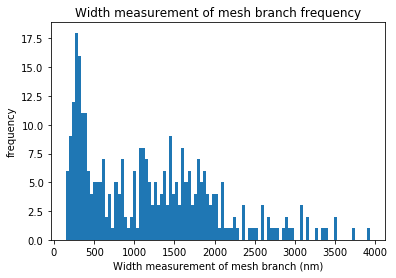

In [29]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,1)
bins = plt.hist(np.array(total_widths),bins=100)
ax.set_xlabel("Width measurement of mesh branch (nm)")
ax.set_ylabel("frequency")
ax.set_title("Width measurement of mesh branch frequency")
plt.show()

In [ ]:
sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes,
                          other_meshes_colors="random",
                          other_skeletons=total_branch_skeletons,
                          other_skeletons_colors="random",
                          #html_path="two_soma_mesh_skeleton_decomp.html"
                          )

In [ ]:

# sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes[:75],
#                           other_meshes_colors="random",
#                           other_skeletons=total_branch_skeletons[:75],
#                           other_skeletons_colors="random",
#                           html_path="two_soma_mesh_skeleton_decomp.html")

# PART 3: LAST PART OF ANALYSIS WHERE MAKES CONCEPT GRAPHS

In [84]:
import neuron
neuron = reload(neuron)

#getting mesh and skeleton dictionaries
limb_idx_to_branch_meshes_dict = dict()
limb_idx_to_branch_skeletons_dict = dict()
for k in limb_correspondence.keys():
    limb_idx_to_branch_meshes_dict[k] = [limb_correspondence[k][j]["branch_mesh"] for j in limb_correspondence[k].keys()]
    limb_idx_to_branch_skeletons_dict[k] = [limb_correspondence[k][j]["branch_skeleton"] for j in limb_correspondence[k].keys()]      

#getting the soma dictionaries
soma_idx_to_mesh_dict = dict()
for k,v in enumerate(current_mesh_data[0]["soma_meshes"]):
    soma_idx_to_mesh_dict[k] = v

soma_idx_connectivity = current_mesh_data[0]["soma_to_piece_connectivity"]




limb_concept_networkx,limb_labels = neuron.generate_limb_concept_networks_from_global_connectivity(
    limb_idx_to_branch_meshes_dict = limb_idx_to_branch_meshes_dict,
    limb_idx_to_branch_skeletons_dict = limb_idx_to_branch_skeletons_dict,
    soma_idx_to_mesh_dict = soma_idx_to_mesh_dict,
    soma_idx_connectivity = soma_idx_connectivity,
    current_neuron=current_neuron,
    return_limb_labels=True
    )

#Before go and get concept maps:
print("Sizes of dictionaries sent")
for curr_limb in limb_idx_to_branch_skeletons_dict.keys():
    print((len(limb_idx_to_branch_skeletons_dict[curr_limb]),len(limb_idx_to_branch_meshes_dict[curr_limb])))
    
    
print("\n\n Sizes of concept maps gotten back")
for curr_idx in limb_concept_networkx.keys():
    for soma_idx,concept_graph in limb_concept_networkx[curr_idx].items():
        print(len(np.unique(list(concept_graph.nodes()))))



------Working on limb 0 -------
inside loop len(curr_limb_divided_meshes) = 75len(curr_limb_divided_skeletons) = 75
inside inner loop len(curr_limb_divided_skeletons) = 75
closest_endpoint = [755723.6 950078.8 875890.2]
At the start, starting_node = [49]
edge_endpoints_to_process was empty so exiting loop after 75 iterations
starting_node = [49]
Total time for branches to concept conversion = 0.3190021514892578

After concept mapping size = 75
Local time for concept mapping = 12.125120401382446


------Working on limb 1 -------
inside loop len(curr_limb_divided_meshes) = 51len(curr_limb_divided_skeletons) = 51
Merge limb detected
inside inner loop len(curr_limb_divided_skeletons) = 51
closest_endpoint = [764864. 961024. 878460.]
At the start, starting_node = [12]
edge_endpoints_to_process was empty so exiting loop after 33 iterations
starting_node = [12]
Total time for branches to concept conversion = 0.2195279598236084

After concept mapping size = 33
inside inner loop len(curr_limb

KeyboardInterrupt: 

In [101]:
k = 1
total_branches = [limb_correspondence[k][j]["branch_skeleton"] for j in limb_correspondence[k].keys()]  
total_branches_graph = sk.convert_skeleton_to_graph(sk.stack_skeletons(total_branches))
len(list(nx.connected_components(total_branches_graph)))

1

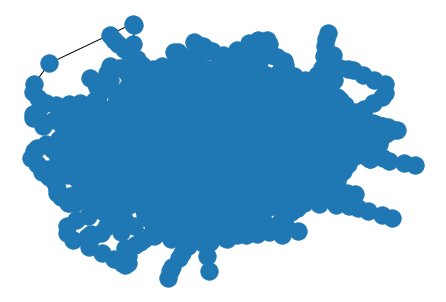

In [86]:
curr_limb = 1
curr_sk_graph_debug = sk.convert_skeleton_to_graph(sk.stack_skeletons(limb_idx_to_branch_skeletons_dict[curr_limb]))
#nx.draw(curr_sk_graph_debug)

In [102]:
# undownsampled graph 
non_downsampled_skel = sk.stack_skeletons(limb_idx_to_branch_skeletons_dict[curr_limb])
non_downsampled_skel_graph = sk.convert_skeleton_to_graph(non_downsampled_skel)
len(list(nx.connected_components(non_downsampled_skel_graph)))

1

# Lets check which segments are not matching

In [194]:
from neuron import Branch
for j,b in enumerate(limb_idx_to_branch_skeletons_dict[curr_limb]):
    if j != 22:
        continue
    
    resized_branch = sk.resize_skeleton_branch(b,n_segments=1) 
    original_branch = Branch(b)
    new_branch = Branch(resized_branch)
    if not np.array_equal(np.sort(original_branch.endpoints,axis=0),np.sort(new_branch.endpoints,axis=0)):
        raise Exception(f"endpoints not equal after resizing branch {j}")
    #print(f"original_branch.skeleton = {original_branch.skeleton}")
    #print(f"new_branch.skeleton = {new_branch.skeleton}")
    sk.graph_skeleton_and_mesh(other_skeletons=[original_branch.skeleton,new_branch.skeleton],
                              other_skeletons_colors=["red","black"])
    
    
    
    

In [206]:
18 - 1 + 34 - 1

50

In [265]:
limb_idx_to_branch_skeletons_dict[curr_limb][i]

array([[[ 812903.1, 1017890. ,  850347.7],
        [ 812601. , 1016940. ,  850772. ]],

       [[ 812263. , 1017030. ,  850725. ],
        [ 812601. , 1016940. ,  850772. ]]])

51 (51, 2, 3)


[array([[ 558916.8, 1122107. ,  842972.9],
        [ 621204. , 1079950. ,  847071. ]]),
 array([[ 612214.6, 1078839. ,  853676.8],
        [ 621204. , 1079950. ,  847071. ]]),
 array([[ 621204., 1079950.,  847071.],
        [ 654870., 1065610.,  847439.]]),
 array([[ 641680., 1084340.,  837559.],
        [ 654870., 1065610.,  847439.]]),
 array([[ 654870., 1065610.,  847439.],
        [ 742133., 1037920.,  840478.]]),
 array([[ 728175. , 1043080. ,  850603. ],
        [ 741460.8, 1037299. ,  841086.3]]),
 array([[ 741460.8, 1037299. ,  841086.3],
        [ 746774. , 1038960. ,  843801. ]]),
 array([[ 742133., 1037920.,  840478.],
        [ 752861., 1034770.,  842570.]]),
 array([[ 752861. , 1034770. ,  842570. ],
        [ 757736.6, 1036779. ,  842454.8]]),
 array([[ 752861., 1034770.,  842570.],
        [ 809721., 1017650.,  850366.]]),
 array([[ 753752., 1002870.,  906153.],
        [ 847427.,  998655.,  862183.]]),
 array([[764864., 961024., 878460.],
        [783149., 967037., 8809

In [ ]:
returned_split

In [269]:
downsampled_skeleton.

array([[[ 558916.8, 1122107. ,  842972.9],
        [ 621204. , 1079950. ,  847071. ]],

       [[ 612214.6, 1078839. ,  853676.8],
        [ 621204. , 1079950. ,  847071. ]],

       [[ 621204. , 1079950. ,  847071. ],
        [ 654870. , 1065610. ,  847439. ]],

       [[ 641680. , 1084340. ,  837559. ],
        [ 654870. , 1065610. ,  847439. ]],

       [[ 654870. , 1065610. ,  847439. ],
        [ 742133. , 1037920. ,  840478. ]],

       [[ 728175. , 1043080. ,  850603. ],
        [ 741460.8, 1037299. ,  841086.3]],

       [[ 741460.8, 1037299. ,  841086.3],
        [ 746774. , 1038960. ,  843801. ]],

       [[ 742133. , 1037920. ,  840478. ],
        [ 752861. , 1034770. ,  842570. ]],

       [[ 752861. , 1034770. ,  842570. ],
        [ 757736.6, 1036779. ,  842454.8]],

       [[ 752861. , 1034770. ,  842570. ],
        [ 809721. , 1017650. ,  850366. ]],

       [[ 753752. , 1002870. ,  906153. ],
        [ 847427. ,  998655. ,  862183. ]],

       [[ 764864. ,  961024. ,  

In [267]:
# graphing the original segment and then the two disconnected components
curr_branch_meshes_downsampled = [sk.resize_skeleton_branch(b,n_segments=1) for b in limb_idx_to_branch_skeletons_dict[curr_limb]]
downsampled_skeleton = sk.stack_skeletons(curr_branch_meshes_downsampled)
curr_sk_graph_debug = sk.convert_skeleton_to_graph(downsampled_skeleton)


con_comp = list(nx.connected_components(curr_sk_graph_debug))
print((len(con_comp), len(con_comp[0]), len(con_comp[1])))

subgraph_0 = curr_sk_graph_debug.subgraph(con_comp[0])
subgraph_0_skeleton = sk.convert_graph_to_skeleton(subgraph_0)
subgraph_1 = curr_sk_graph_debug.subgraph(con_comp[1])
subgraph_1_skeleton = sk.convert_graph_to_skeleton(subgraph_1)

non_downsampled_skel = sk.stack_skeletons(limb_idx_to_branch_skeletons_dict[curr_limb])

# sk.graph_skeleton_and_mesh(other_skeletons=[
#                             non_downsampled_skel,
#                         subgraph_0_skeleton,
#                         subgraph_1_skeleton],
#                           other_skeletons_colors=[
#                                                   "red",
#                                                   "black",
#                                                   "black"])
i = 49
print(f"Showing the {i} branch")
sk.graph_skeleton_and_mesh(#edge_coordinates=downsampled_skeleton,
                          other_skeletons=limb_idx_to_branch_skeletons_dict[curr_limb],
                          other_skeletons_colors="random")

(2, 18, 34)
Showing the 49 branch


In [ ]:
sk. decom

In [187]:
y = np.array([[ 621204.,  1122107.,   847071. ],[ 558916.8, 1079950.,   842972.9]])
np.sort(y,axis=0)

array([[ 558916.8, 1079950. ,  842972.9],
       [ 621204. , 1122107. ,  847071. ]])

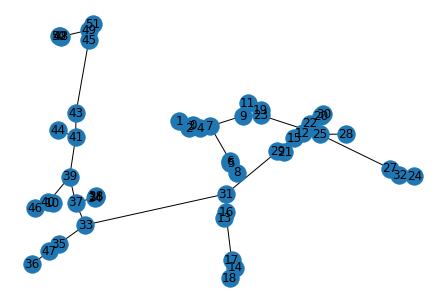

In [91]:
curr_branch_meshes_downsampled = [sk.resize_skeleton_branch(b,n_segments=1) for b in limb_idx_to_branch_skeletons_dict[curr_limb]]
downsampled_skeleton = sk.stack_skeletons(curr_branch_meshes_downsampled)
curr_sk_graph_debug = sk.convert_skeleton_to_graph(downsampled_skeleton)
nx.draw(curr_sk_graph_debug,with_labels = True)

In [96]:
con_comp = list(nx.connected_components(curr_sk_graph_debug))
len(con_comp), len(con_comp[0]), len(con_comp[1])

(2, 18, 34)

In [ ]:
# Things I need to check:
#1) When 

# Debugging why concept map is smaller than number of meshes

In [106]:
indices

array([ 0,  2,  1,  2,  2,  4,  3,  4,  4,  7,  5,  6,  6,  8,  7,  9,  9,
       11,  9, 23, 10, 40, 12, 15, 13, 16, 14, 17, 15, 22, 15, 29, 16, 17,
       16, 31, 17, 18, 19, 23, 20, 22, 21, 29, 22, 30, 23, 25, 24, 27, 25,
       28, 26, 34, 27, 32, 29, 31, 31, 33, 33, 35, 33, 37, 34, 38, 34, 37,
       35, 36, 35, 47, 37, 39, 39, 40, 39, 41, 40, 46, 42, 48, 41, 43, 41,
       44, 43, 45, 43, 45, 45, 49, 48, 50, 48, 49, 49, 51, 25, 27,  6,  7])

In [149]:
all_conn_comp[0]

TypeError: 'set' object does not support indexing

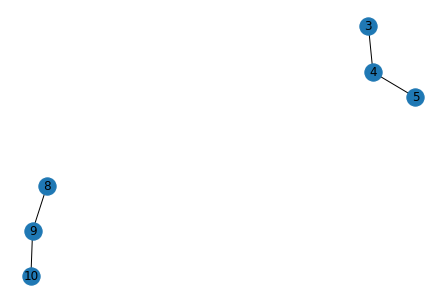

The new graph


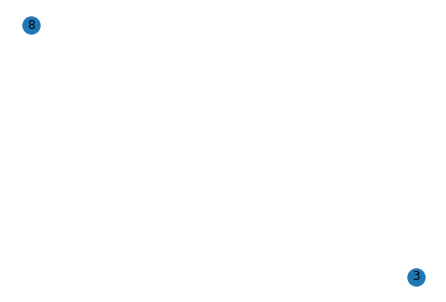



 x= [[ 3  3  3]
 [ 3  6  7]
 [ 3  3  3]
 [ 8  8  8]
 [ 8  8 11]]


In [155]:
# Example graph for finding components
ex_edges = np.array([[3,4],[4,5],[8,9],[9,10]]).reshape(-1,2)
ex_graph = nx.from_edgelist(ex_edges)
nx.draw(ex_graph,with_labels=True)
plt.show()

#get the connected components
all_conn_comp = list(nx.connected_components(ex_graph))
all_conn_comp

to_delete_nodes = []
for c_comp in all_conn_comp:
    curr_comp = list(c_comp)
    dom_node = curr_comp[0]
    non_dom_nodes = curr_comp[1:]
    for n_dom in non_dom_nodes:
        x[x==n_dom] = dom_node
        to_delete_nodes.append(n_dom)

 
#6) Delete all the non-dominant edges
print("The new graph")
ex_graph.remove_nodes_from(to_delete_nodes)
nx.draw(ex_graph,with_labels=True)
plt.show()

print(f"\n\n x= {x}")
    

In [159]:
"""
leftover is 3,6,7,8,11
and want to map them to 0,1,2,3,4
"""
unique_leftovers = np.sort(np.unique(x.ravel()))
#construct a dictionary for mapping
map_dict = dict([(v,k) for k,v in enumerate(unique_leftovers)])
map_dict

def vec_translate(a):    
    return np.vectorize(map_dict.__getitem__)(a)

new_x = vec_translate(x)
new_x

array([[0, 0, 0],
       [0, 1, 2],
       [0, 0, 0],
       [3, 3, 3],
       [3, 3, 4]])

In [160]:
x = np.array([[3,4,5],
         [5,6,7],
         [4,3,4],
        [8,9,9],
             [9,10,11]])

deleted_x = np.delete(x,[1,3],axis=0)
deleted_x

array([[ 3,  4,  5],
       [ 4,  3,  4],
       [ 9, 10, 11]])

In [ ]:
ignore_diagonal=True
equiv_distance=3
possible_vertices = new_unique.reshape(-1,3)
    
dist_matrix = nu.get_coordinate_distance_matrix(possible_vertices)

dist_matrix_copy = dist_matrix.copy()
dist_matrix_copy[np.eye(dist_matrix.shape[0]).astype("bool")] = np.inf
print(f"The smallest distance (not including diagonal) = {np.min(dist_matrix_copy)}")

matching_vertices = np.array(np.where(dist_matrix <= equiv_distance)).T
if ignore_diagonal:
    left_side = matching_vertices[:,0]
    right_side = matching_vertices[:,1]

    result= matching_vertices[left_side != right_side]
else:
    result = matching_vertices
    
result = np.unique(np.sort(result,axis=1),axis=0)
result

In [170]:


# def convert_skeleton_to_graph_debug(staring_edges,
#                              stitch_print=False,
#                                    combine_node_dist = 1):
#     """
#     Purpose: To automatically convert a skeleton to a graph
    
#     * 7/9 adjustments: make so slight differences in coordinates not affect the graph
    
#     Pseudocode for how you could apply the closeness to skeletons
#     1) Get the unique rows
#     2) See if there are any rows that are the same (that gives you what to change them to)
#     3) put those into a graph and find the connected components
#     4) Pick the first node in the component to be the dominant one
#     a. for each non-dominant node, replace every occurance of the non-dominant one with the dominant one in indices
#     - add the non-dominant ones to a list to delete 
    
#     ** this will result in an indices that doesn't have any of the repeat nodes, but the repeat nodes are still 
#     taking up the numbers that they were originally in order with ***
    
#     np.delete(x,[1,3],axis=0)) # to delete the rows 
    
    
    
    
#     5) Do everything like normal
#     6) Delete all the non-dominant edges 
# """
#     stitch_start = time.time()

#     all_skeleton_vertices = staring_edges.reshape(-1,3)
#     unique_rows,indices = np.unique(all_skeleton_vertices,return_inverse=True,axis=0)
#     #need to merge unique indices so if within a certain range of each other then merge them together
    
    
#     #part where will combine nodes that are very close
#     matching_nodes = nu.get_matching_vertices(unique_rows,equiv_distance=combine_node_dist)
    
#     if len(matching_nodes) > 0:
#         """
#         Overall this loop will change the unique_rows and indices to account for nodes that should be merged
#         """
#         # Example graph for finding components
#         ex_edges = matching_nodes.reshape(-1,2)
#         ex_graph = nx.from_edgelist(ex_edges)


#         #get the connected components
#         all_conn_comp = list(nx.connected_components(ex_graph))

#         to_delete_nodes = []
#         for c_comp in all_conn_comp:
#             curr_comp = list(c_comp)
#             dom_node = curr_comp[0]
#             non_dom_nodes = curr_comp[1:]
#             for n_dom in non_dom_nodes:
#                 indices[indices==n_dom] = dom_node
#                 to_delete_nodes.append(n_dom)
                
#         unique_leftovers = np.sort(np.unique(indices.ravel()))
#         #construct a dictionary for mapping
#         map_dict = dict([(v,k) for k,v in enumerate(unique_leftovers)])
        
#         print(f"Gettng rid of {len(to_delete_nodes)} nodes")

#         def vec_translate(a):    
#             return np.vectorize(map_dict.__getitem__)(a)

#         indices = vec_translate(indices)
        
#         #now delete the rows that were ignored
#         unique_rows = np.delete(unique_rows,to_delete_nodes,axis=0)
        
#         #do a check to make sure everything is working
#         if len(np.unique(indices.ravel())) != len(unique_rows) or max(np.unique(indices.ravel())) != len(unique_rows) - 1:
#             raise Exception("The indices list does not match the size of the unique rows"
#                            f"np.unique(indices.ravel()) = {np.unique(indices.ravel())}, len(unique_rows)= {len(unique_rows) }")
    
#     #resume regular conversion
#     edges_with_coefficients = indices.reshape(-1,2)
    
    

#     if stitch_print:
#         print(f"Getting the unique rows and indices= {time.time()-stitch_start}")
#     stitch_start = time.time()

#     #create the graph from the edges
#     #B = nx.Graph() #old way
#     B = xu.GraphOrderedEdges()
#     B.add_nodes_from([(int(x),{"coordinates":y}) for x,y in enumerate(unique_rows)])
#     #print("just added the nodes")
#     #print(f"xu.get_edge_attributes(B)= {xu.get_edge_attributes(B)}")
    
#     #B.add_edges_from(edges_with_coefficients) #older weights without weights
#     #adds weights for the edges
#     weights = np.linalg.norm(unique_rows[edges_with_coefficients[:,0]] - unique_rows[edges_with_coefficients[:,1]],axis=1)
#     edges_with_weights = np.hstack([edges_with_coefficients,weights.reshape(-1,1)])
#     B.add_weighted_edges_from(edges_with_weights)
#     #print("right after add_weighted_edges_from")
#     #print(f"xu.get_edge_attributes(B)= {xu.get_edge_attributes(B)}")

#     if stitch_print:
#         print(f"Putting edges into networkx graph= {time.time()-stitch_start}")
#     stitch_start = time.time()

#     # find the shortest distance between the two different subgraphs:
#     from scipy.spatial import distance_matrix
#     #print(f"B.__class__ = {B.__class__}")
#     #print(f"xu.get_edge_attributes(B)= {xu.get_edge_attributes(B)}")
#     UG = B
#     #UG = B.to_undirected()
    
#     if stitch_print:
#         print(f"Making undirected graph= {time.time()-stitch_start}")
#     stitch_start = time.time()
    
#     #UG.remove_edges_from(nx.selfloop_edges(UG))
#     UG = xu.remove_selfloops(UG)
#     #print(f"UG.__class__ = {UG.__class__}")
#     #make sure the edges are ordered 
#     UG.reorder_edges()
#     #print(f"UG.__class__ = {UG.__class__}")
#     return UG

In [164]:
downsampled_skeleton

array([[[ 558916.8, 1122107. ,  842972.9],
        [ 621204. , 1079950. ,  847071. ]],

       [[ 612214.6, 1078839. ,  853676.8],
        [ 621204. , 1079950. ,  847071. ]],

       [[ 621204. , 1079950. ,  847071. ],
        [ 654870. , 1065610. ,  847439. ]],

       [[ 641680. , 1084340. ,  837559. ],
        [ 654870. , 1065610. ,  847439. ]],

       [[ 654870. , 1065610. ,  847439. ],
        [ 742133. , 1037920. ,  840478. ]],

       [[ 728175. , 1043080. ,  850603. ],
        [ 741460.8, 1037299. ,  841086.3]],

       [[ 741460.8, 1037299. ,  841086.3],
        [ 746774. , 1038960. ,  843801. ]],

       [[ 742133. , 1037920. ,  840478. ],
        [ 752861. , 1034770. ,  842570. ]],

       [[ 752861. , 1034770. ,  842570. ],
        [ 757736.6, 1036779. ,  842454.8]],

       [[ 752861. , 1034770. ,  842570. ],
        [ 809721. , 1017650. ,  850366. ]],

       [[ 753752. , 1002870. ,  906153. ],
        [ 847427. ,  998655. ,  862183. ]],

       [[ 764864. ,  961024. ,  

In [175]:
downsampled_skeleton_copy = downsampled_skeleton.copy()
downsampled_skeleton_copy[1][1] = [ 621204., 1079950.,  847071.5]
downsampled_skeleton_copy[3][1] = [ 654870. , 1065610. ,  847442.1 ]
downsampled_skeleton_copy

array([[[ 558916.8, 1122107. ,  842972.9],
        [ 621204. , 1079950. ,  847071. ]],

       [[ 612214.6, 1078839. ,  853676.8],
        [ 621204. , 1079950. ,  847071.5]],

       [[ 621204. , 1079950. ,  847071. ],
        [ 654870. , 1065610. ,  847439. ]],

       [[ 641680. , 1084340. ,  837559. ],
        [ 654870. , 1065610. ,  847442.1]],

       [[ 654870. , 1065610. ,  847439. ],
        [ 742133. , 1037920. ,  840478. ]],

       [[ 728175. , 1043080. ,  850603. ],
        [ 741460.8, 1037299. ,  841086.3]],

       [[ 741460.8, 1037299. ,  841086.3],
        [ 746774. , 1038960. ,  843801. ]],

       [[ 742133. , 1037920. ,  840478. ],
        [ 752861. , 1034770. ,  842570. ]],

       [[ 752861. , 1034770. ,  842570. ],
        [ 757736.6, 1036779. ,  842454.8]],

       [[ 752861. , 1034770. ,  842570. ],
        [ 809721. , 1017650. ,  850366. ]],

       [[ 753752. , 1002870. ,  906153. ],
        [ 847427. ,  998655. ,  862183. ]],

       [[ 764864. ,  961024. ,  

In [179]:
nu = reload(nu)
convert_skeleton_to_graph_debug(downsampled_skeleton)

The smallest distance (not including diagonal) = 352.9206709729539


In [177]:
new_skel = convert_skeleton_to_graph_debug(downsampled_skeleton_copy,combine_node_dist = 5)
sk.convert_graph_to_skeleton(new_skel)

The smallest distance (not including diagonal) = 0.5
using less than sign
Gettng rid of 2 nodes


array([[[ 558916.8, 1122107. ,  842972.9],
        [ 621204. , 1079950. ,  847071. ]],

       [[ 612214.6, 1078839. ,  853676.8],
        [ 621204. , 1079950. ,  847071. ]],

       [[ 621204. , 1079950. ,  847071. ],
        [ 654870. , 1065610. ,  847439. ]],

       [[ 641680. , 1084340. ,  837559. ],
        [ 654870. , 1065610. ,  847439. ]],

       [[ 654870. , 1065610. ,  847439. ],
        [ 742133. , 1037920. ,  840478. ]],

       [[ 728175. , 1043080. ,  850603. ],
        [ 741460.8, 1037299. ,  841086.3]],

       [[ 741460.8, 1037299. ,  841086.3],
        [ 746774. , 1038960. ,  843801. ]],

       [[ 741460.8, 1037299. ,  841086.3],
        [ 742133. , 1037920. ,  840478. ]],

       [[ 742133. , 1037920. ,  840478. ],
        [ 752861. , 1034770. ,  842570. ]],

       [[ 752861. , 1034770. ,  842570. ],
        [ 757736.6, 1036779. ,  842454.8]],

       [[ 752861. , 1034770. ,  842570. ],
        [ 809721. , 1017650. ,  850366. ]],

       [[ 753752. , 1002870. ,  

In [141]:
nu=reload(nu)
all_skeleton_vertices = downsampled_skeleton.reshape(-1,3)
unique_rows,indices = np.unique(all_skeleton_vertices,return_inverse=True,axis=0)
#nu.get_matching_vertices(unique_rows,equiv_distance=4)

new_unique = np.vstack([unique_rows,np.array([[ 877438. , 1057100. ,  840522. ],[ 800000. , 800000. ,  800000. ]]).reshape(-1,3)])

# nu.get_matching_vertices(new_unique,equiv_distance=3)


The smallest distance (not including diagonal) = 1.0
using less than sign


array([[51, 52]])

The smallest distance (not including diagonal) = 1.0


array([[51, 52]])

In [139]:
np.unique(np.sort([],axis=1),axis=0)

AxisError: axis 1 is out of bounds for array of dimension 1

In [123]:
dist_matrix[np.eye(dist_matrix.shape[0]).astype("bool")] = np.inf
np.min(dist_matrix)

352.9206709729539

# the final data that will be ported over to the Neuron class

In [38]:

current_neuron
"""
whole neuron to be used for other processing
"""

# The 0 at the front is to say it is the first seperated mesh containing somas (could be multiple)
current_mesh_data[0].keys()
"""
soma_meshes
soma_to_piece_connectivity
"""
"""
limb_correspondence[0][0].keys() --> the exact limb and the exact branch

AKA [limb_idx][branch_idx]

"""
limb_correspondence[0][0]["branch_skeleton"]
limb_correspondence[0][0]["width_from_skeleton"]
limb_correspondence[0][0]["branch_mesh"]
limb_correspondence[0][0]["branch_face_idx"]



limb_concept_networkx
limb_labels
"""
Concept networks for limbs and labels of all limbs
"""

'\nConcept networks for limbs and labels of all limbs\n'

{0: {0: <networkx_utils.GraphOrderedEdges at 0x7f7737c74cc0>},
 1: {0: <networkx_utils.GraphOrderedEdges at 0x7f7737c6b630>,
  1: <networkx_utils.GraphOrderedEdges at 0x7f773ebeb5c0>},
 2: {0: <networkx_utils.GraphOrderedEdges at 0x7f7737c74160>},
 3: {0: <networkx_utils.GraphOrderedEdges at 0x7f7737c74588>},
 4: {1: <networkx_utils.GraphOrderedEdges at 0x7f773ebebc50>},
 5: {0: <networkx_utils.GraphOrderedEdges at 0x7f7737c6bb70>},
 6: {1: <networkx_utils.GraphOrderedEdges at 0x7f7737c6b0f0>},
 7: {1: <networkx_utils.GraphOrderedEdges at 0x7f773ebeb978>},
 8: {1: <networkx_utils.GraphOrderedEdges at 0x7f7737c6b470>},
 9: {1: <networkx_utils.GraphOrderedEdges at 0x7f7737c74d30>},
 10: {0: <networkx_utils.GraphOrderedEdges at 0x7f7737c59ba8>}}

# Plotting for visualizataions (used for platinum update report)

In [39]:
curr_limb_idx = 2

In [41]:
#plotting the mesh
sk = reload(sk)
mu = reload(mu)
random_colors_used = sk.graph_skeleton_and_mesh(
    other_meshes=[v["branch_mesh"] for k,v in limb_correspondence[curr_limb_idx].items() ],
                          other_meshes_colors="random",
                          other_skeletons=[v["branch_skeleton"] for k,v in limb_correspondence[curr_limb_idx].items() ],
                          other_skeletons_colors="random",
                            mesh_alpha=0.8,
                          return_other_colors=True)
random_colors_used_no_alpha = random_colors_used[:,:-1]

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [42]:
#plotting the skeleton
sk = reload(sk)
mu = reload(mu)
sk.graph_skeleton_and_mesh(#other_meshes=total_branch_meshes[:node_to_check_to],
                          #other_meshes_colors="random",
                          other_skeletons=[v["branch_skeleton"] for k,v in limb_correspondence[curr_limb_idx].items() ],
                          other_skeletons_colors="random",
                            mesh_alpha=0.05)


In [44]:
# get the label:
limb_labels[curr_limb_idx]

'Normal'

In [53]:
len([v["branch_mesh"] for k,v in limb_correspondence[curr_limb_idx].items() ])

55

In [59]:
limb_concept_networkx

{0: {0: <networkx_utils.GraphOrderedEdges at 0x7f7737c74cc0>},
 1: {0: <networkx_utils.GraphOrderedEdges at 0x7f7737c6b630>,
  1: <networkx_utils.GraphOrderedEdges at 0x7f773ebeb5c0>},
 2: {0: <networkx_utils.GraphOrderedEdges at 0x7f7737c74160>},
 3: {0: <networkx_utils.GraphOrderedEdges at 0x7f7737c74588>},
 4: {1: <networkx_utils.GraphOrderedEdges at 0x7f773ebebc50>},
 5: {0: <networkx_utils.GraphOrderedEdges at 0x7f7737c6bb70>},
 6: {1: <networkx_utils.GraphOrderedEdges at 0x7f7737c6b0f0>},
 7: {1: <networkx_utils.GraphOrderedEdges at 0x7f773ebeb978>},
 8: {1: <networkx_utils.GraphOrderedEdges at 0x7f7737c6b470>},
 9: {1: <networkx_utils.GraphOrderedEdges at 0x7f7737c74d30>},
 10: {0: <networkx_utils.GraphOrderedEdges at 0x7f7737c59ba8>}}

In [70]:
#1,2,3,7
curr_limb_idx = 10
for soma_idx,concept_graph in limb_concept_networkx[curr_limb_idx].items():
    print((len(np.unique(list(concept_graph.nodes()))),len([v["branch_mesh"] for k,v in limb_correspondence[curr_limb_idx].items() ])))

(1, 1)


Starting from soma index 0 with starting_coordinate and mesh: [[757928.4 962502.2 866083.1]]


ValueError: 'c' argument has 55 elements, which is not acceptable for use with 'x' with size 53, 'y' with size 53.

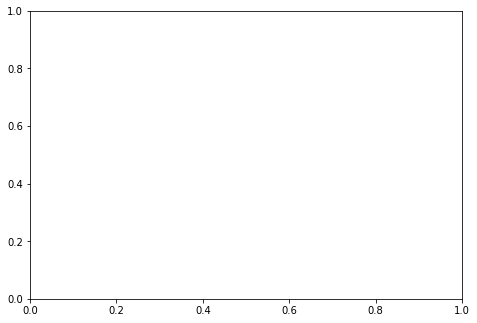

In [49]:

import matplotlib.pyplot as plt
%matplotlib inline
for soma_idx,concept_graph in limb_concept_networkx[curr_limb_idx].items():
    print(f"Starting from soma index {soma_idx} with starting_coordinate and mesh: "
          f"{xu.get_node_attributes(concept_graph,attribute_name='starting_coordinate')}")
    # plotting the concept network with the same colors
    nx.draw(concept_graph,node_color=random_colors_used_no_alpha) 
    plt.show()
    print("\n\n")

In [ ]:
# Try plotting the points in 3D: random_colors_used = sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes[:node_to_check_to],
mesh_midpoints =  [np.array([np.mean(k.vertices,axis=0)]) for k in total_branch_meshes[:node_to_check_to]]
graph_nodes_skeleton = np.array(mesh_midpoints)[concept_graph.edges_ordered()].reshape(-1,2,3)
[k for k in graph_nodes_skeleton]
random_colors_used[:,-1] = 1


sk.graph_skeleton_and_mesh(other_scatter=mesh_midpoints,
                          other_scatter_colors=random_colors_used,
                          other_skeletons=graph_nodes_skeleton,
                          other_skeletons_colors="black",
                                               scatter_size=3)

